# MESA model

### Import needed packages

In [1]:
# MESA modules

from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import SingleGrid
from mesa.datacollection import DataCollector
from mesa.batchrunner import BatchRunner

# Other packages

import time
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt

# Different styles to chose from

plt.style.use(['science','retro'])
# plt.style.use("ggplot")
# plt.style.use("Solarize_Light2")
# plt.style.use("dark_background")
# plt.style.use('science')
# plt.style.use(['science','ieee'])

## Model Execution

### Run Setup

In [2]:
seed1 = 2
d_steps = 600
d_version = '26906a'
dynamic_firms = True
act_policies = 'base_scenario'

shock = {'shock_drop':-0.00, # it is relative pay attention and should be negative,
             'shock_duration':24,
             'shock_start':48 }

con_pref = {'increase':0.1166666,   # 0.066666, 0.116666, 0.1666666 
             'con_duration':359,
             'con_start':1 }

imit_scen = {"e_f_r": [8,12],"b_f_r": [8,12],"g_f_r": [9.5,10.5]} 

firm_scen0 =  [{"e_f_r": [7,13],"b_f_r": [7,13],"g_f_r": [7,13],
                "p_i_e": [0.2,0.4] , "p_i_g": [0.2,0.4] , "p_i_b": [0.2,0.4] , 
                "num": 100 }]                                       
policies = {"base_scenario":{'λ_e' : 1/3, 'λ_b' : 1/3,'λ_g' : 1/3,
                             'pp' : 10, 'λ_start' : 1, 'λ_dur' : 599, 'λ_off': 0,
                             'σ_g' : 0.8, 'P_r_l_g' : 1 }}

model_params = {'ω_g' : 0.1, 'ω_b' : 0.8, 'ω_c' : 0.1,      # Impact of innovation on GDP Growth
                'G_min' : 0.985, 'G_max' : 1.015,           # Exogenous GDP growth
                'M_e' : 40, 'γ_e' : 0.015, 'p_hat' : 250,   # Efficiency curve parameters
                'α' : 20, 'μ' : 0.2, 'ψ' : 0.9, 'Φ' : 0.15, # Firms' accounts
                'δ' : 0.3,                          
                'Pr_new' : 1/12,                            # Market dynamics 
                'η' : 0.85, 'Ω' : 0.85,
                'f_a' : 5}                       # Loans' correction factor

### Run Simulations

In [3]:
from Model import Agent, EconomyModel 

np.random.seed(seed1)
start = time.time()
# model = EconomyModel(seed1, d_agents, d_steps, dynamic_firms, scenario[act_scenario],shock)
model = EconomyModel( seed1, d_steps, dynamic_firms, policies[act_policies],shock, con_pref, firm_scen0, imit_scen, model_params)
for i in range(model.num_steps):
    # print('step {}'.format(i))
    model.step()

model_df = model.dc.get_model_vars_dataframe()
agent_df = model.dc.get_agent_vars_dataframe()
agent_df = agent_df.reset_index()
end = time.time()
print(end - start)


2.9959299564361572


#### Save the resulting files

In [4]:
# model_df.to_csv("Data/model_{}_{}_{}.csv".format(d_agents,d_steps,d_version))
# agent_df2 = agent_df.reset_index()
# agent_df2.to_csv("Data/agent_{}_{}_{}.csv".format(d_agents,d_steps,d_version)) 

#### Import past results

In [5]:
model_df.head()

agents  Total_I_fs  PotentialGDP   LongTermGDP  shortTermGDP     ActualGDP  \
0     100           0  1.100000e+06  1.004875e+06  1.048750e+06  1.097500e+06   
1     100           0  1.102029e+06  1.009727e+06  1.075333e+06  1.101915e+06   
2     100           0  1.104717e+06  1.014473e+06  1.089990e+06  1.104647e+06   
3     100           0  1.108707e+06  1.019180e+06  1.099298e+06  1.108605e+06   
4     100           0  1.112722e+06  1.023852e+06  1.105958e+06  1.112619e+06   

   GDPGrowth  InvestmentGrowth       λ_e       λ_b       λ_g   index I  \
0   1.000000          0.000000  0.302868  0.302868  0.394264  1.043662   
1   1.001844          0.521921  0.302705  0.302705  0.394589  1.064974   
2   1.002440          0.241321  0.302543  0.302543  0.394914  1.074440   
3   1.003611          0.143031  0.302380  0.302380  0.395239  1.078610   
4   1.003622          0.014533  0.302218  0.302218  0.395564  1.080194   

      MSWA_g     MSWA_b     MSWA_e       HHI  
0  11.107340  11.598393  11.516228  0.074777  
1  11.272907  11.520818  11.399291  0.074992  
2  11.272907  11.520818  11.399291  0.074992  
3  11.272907  11.520818  11.399291  0.074992  
4  11.272907  11.520818  11.399291  0.074992

#### Secondary stuff for the notebook

In [6]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 200)
x_lin = model_df.index/12+2020

### Inspect agent_df

In [7]:
# agent_df.head(100)

In [8]:
x_lin.shape

(600,)

In [9]:
agent_df.groupby(['Step'])["AgentID"].sum().shape

(600,)

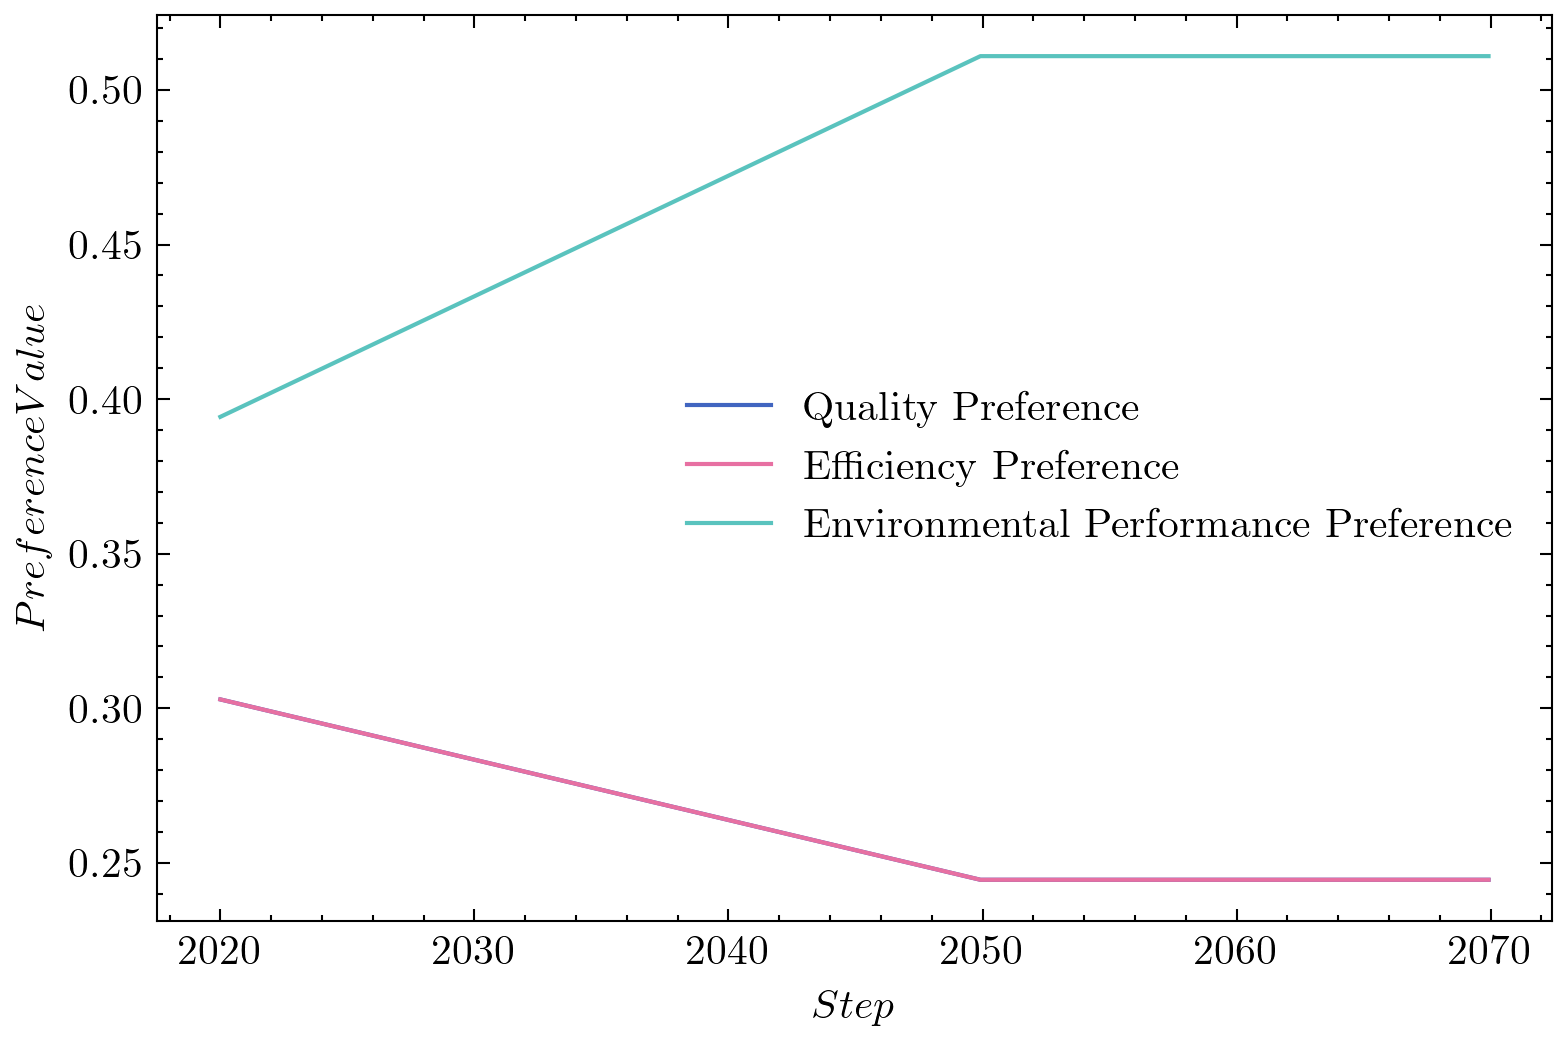

In [10]:
plt.figure(num=None, figsize=(6, 4), dpi=300)

plt.plot(x_lin,model_df.λ_b, label = "Quality Preference")
plt.plot(x_lin,model_df.λ_e, label = "Efficiency Preference")
plt.plot(x_lin,model_df.λ_g, label = "Environmental Performance Preference")
plt.xlabel('$Step$')
plt.ylabel("$Preference Value$")
plt.legend()
# plt.savefig('../Writing/My_Thesis/Chapters/ModelResults/Images/ConPrefBaseCase100Con.pdf')
plt.show()

In [11]:
agent_df[agent_df.AgentID >= 10].groupby(['Step']).name.count().values[1:].shape

(599,)

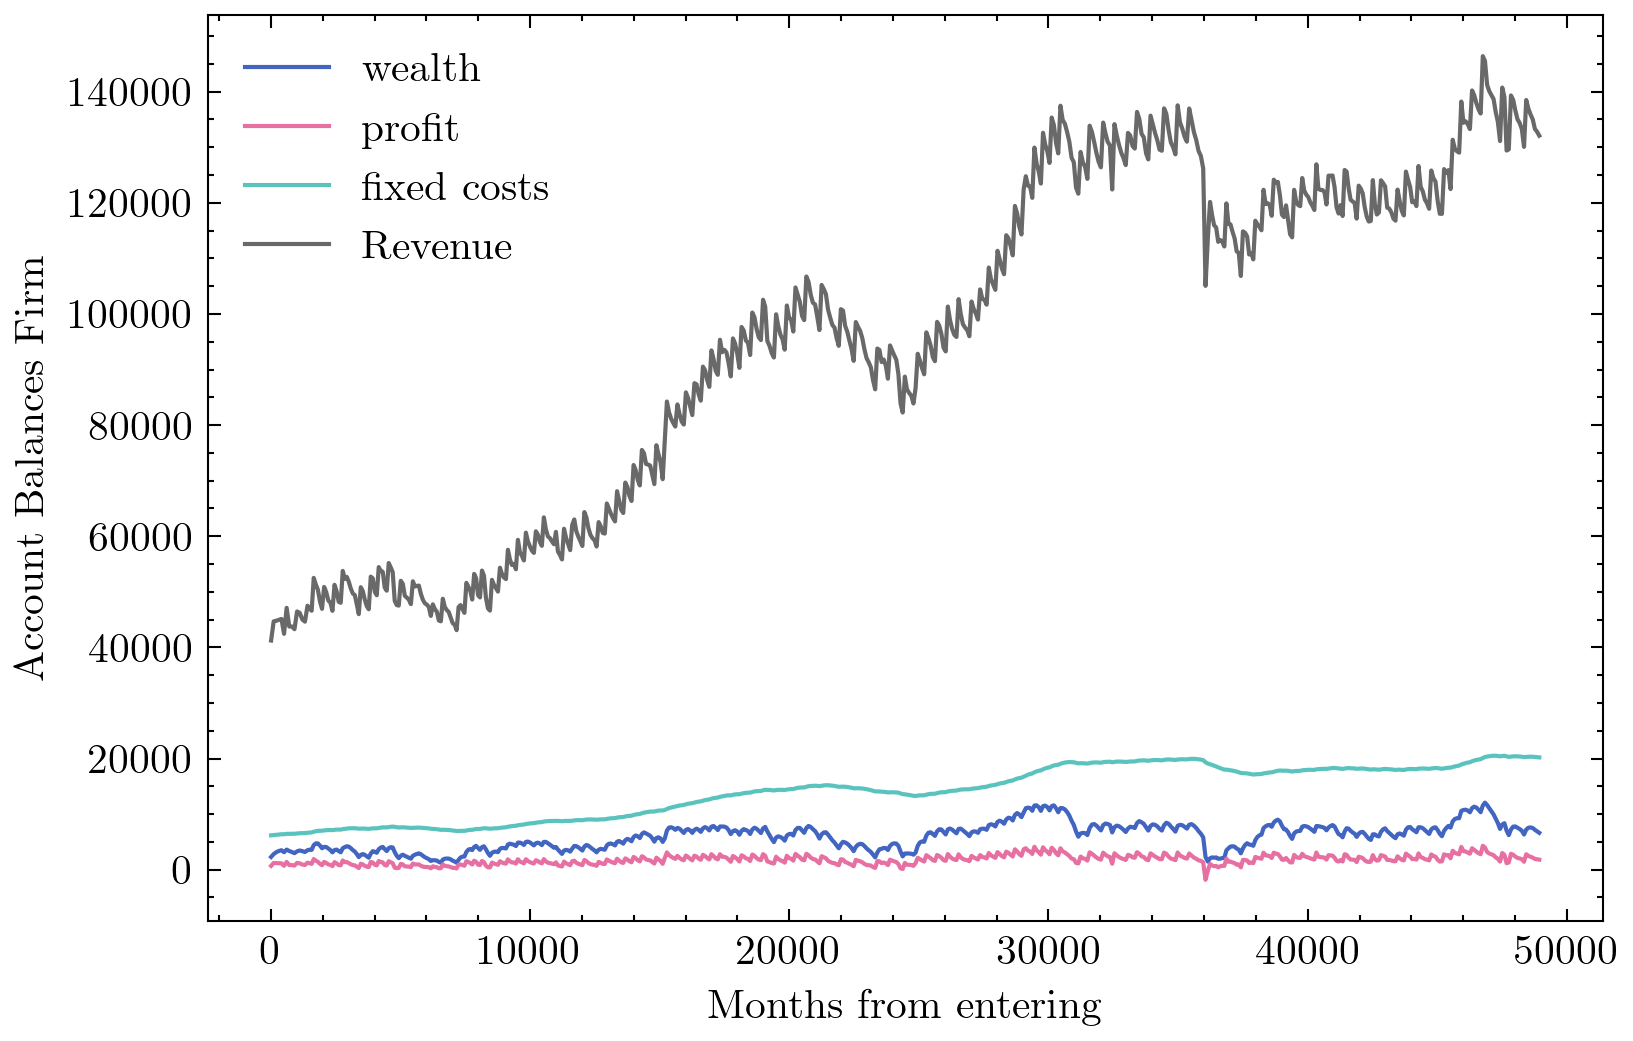

In [12]:
plt.figure(num=None, figsize=(6, 4), dpi=300)
plt.plot(agent_df[agent_df.name == 10].s_fs, label = 'wealth')
plt.plot(agent_df[agent_df.name == 10].π_fs, label = 'profit')
plt.plot(agent_df[agent_df.name == 10].f_c_fs, label = 'fixed costs')
plt.plot(agent_df[agent_df.name == 10].r_fs, label = 'Revenue')
plt.xlabel('Months from entering')
plt.legend()
plt.ylabel('Account Balances Firm')
plt.show()

# Herfindahl–Hirschman

In [13]:
def hh_f(x):
    return sum([i**2 for i in x])

hh_index= agent_df.groupby(['step'])["ms_fs"].apply(hh_f)

In [14]:
print('initial', round(hh_index.iloc[0],3))
print('maximum', round(hh_index.max(),3))
print('min', round(hh_index.min(),3))
print('mean', round(hh_index.mean(),3))
print('final', round(hh_index.iloc[-1],3))

initial 0.075
maximum 0.092
min 0.029
mean 0.061
final 0.064


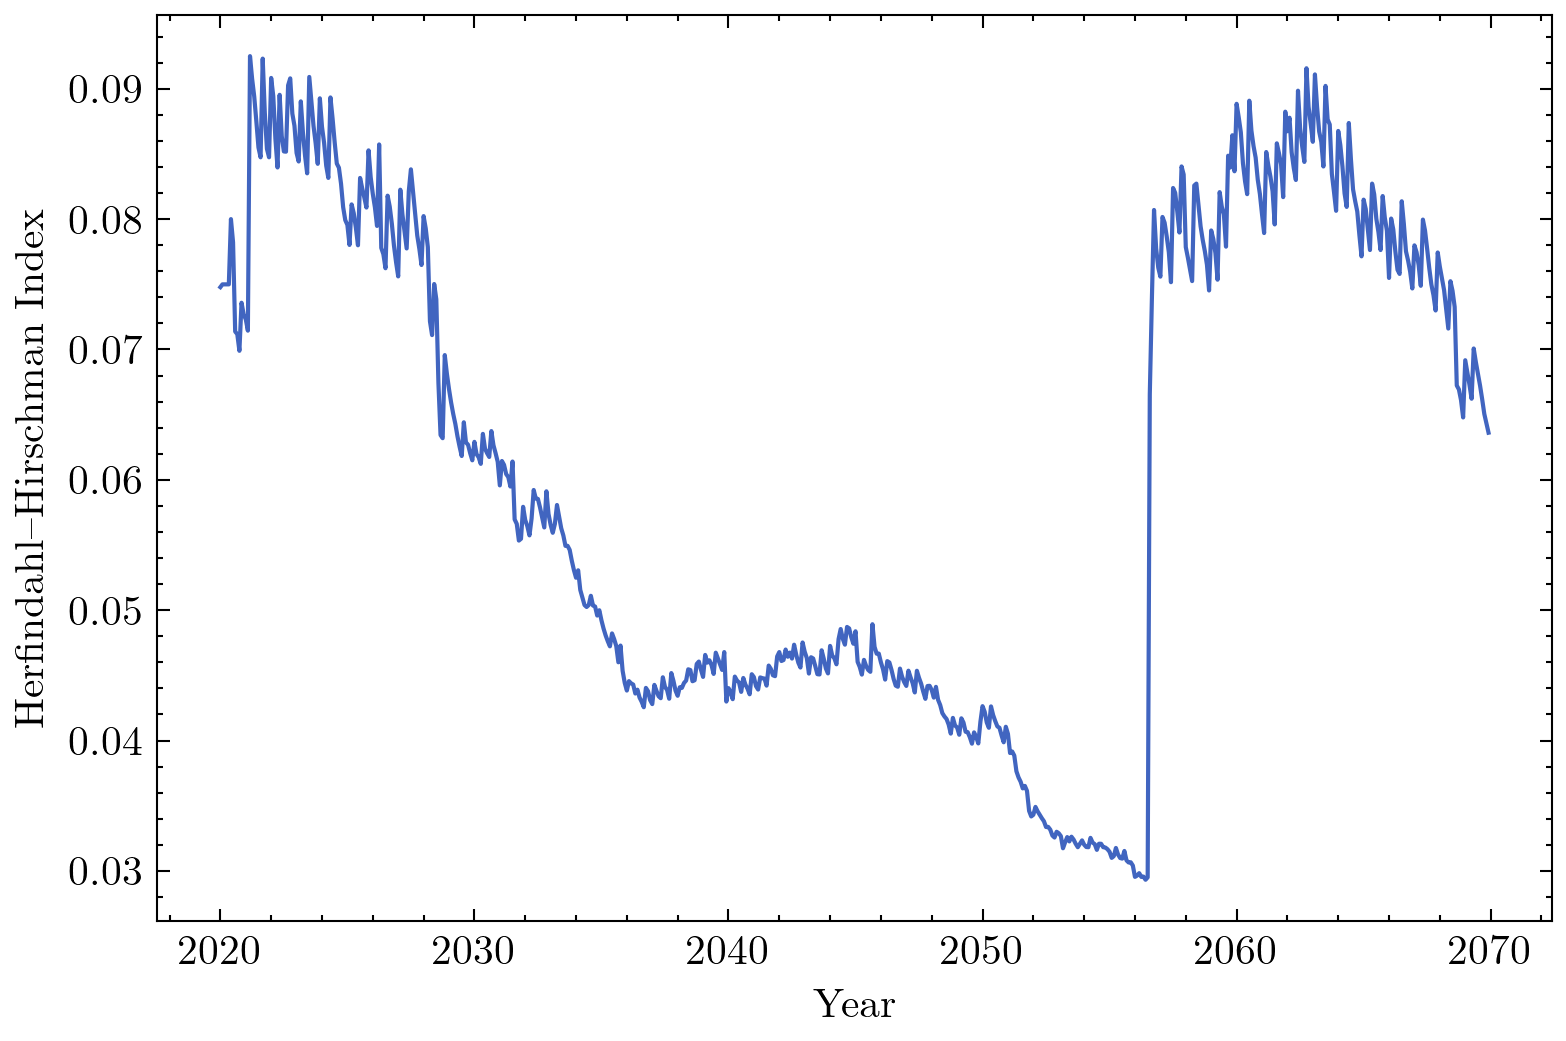

In [15]:
plt.figure(num=None, figsize=(6, 4), dpi=300)
plt.plot(x_lin,hh_index)
plt.xlabel("Year")
plt.ylabel("Herfindahl–Hirschman Index")
# plt.savefig('../Writing/My_Thesis/Chapters/ModelResults/Images/HHBaseCase20.pdf')
# plt.savefig('../Writing/My_Thesis/Chapters/Analysis/Images/HHBaseCase.pdf')
plt.show()

### Inspect model_df

In [16]:
new_agents = []
for i in range(1,d_steps+1):
    temp_df = agent_df[agent_df.Step == i]
    new_agents.append(temp_df[temp_df.AgentID >= firm_scen0[0]['num']].AgentID.count())

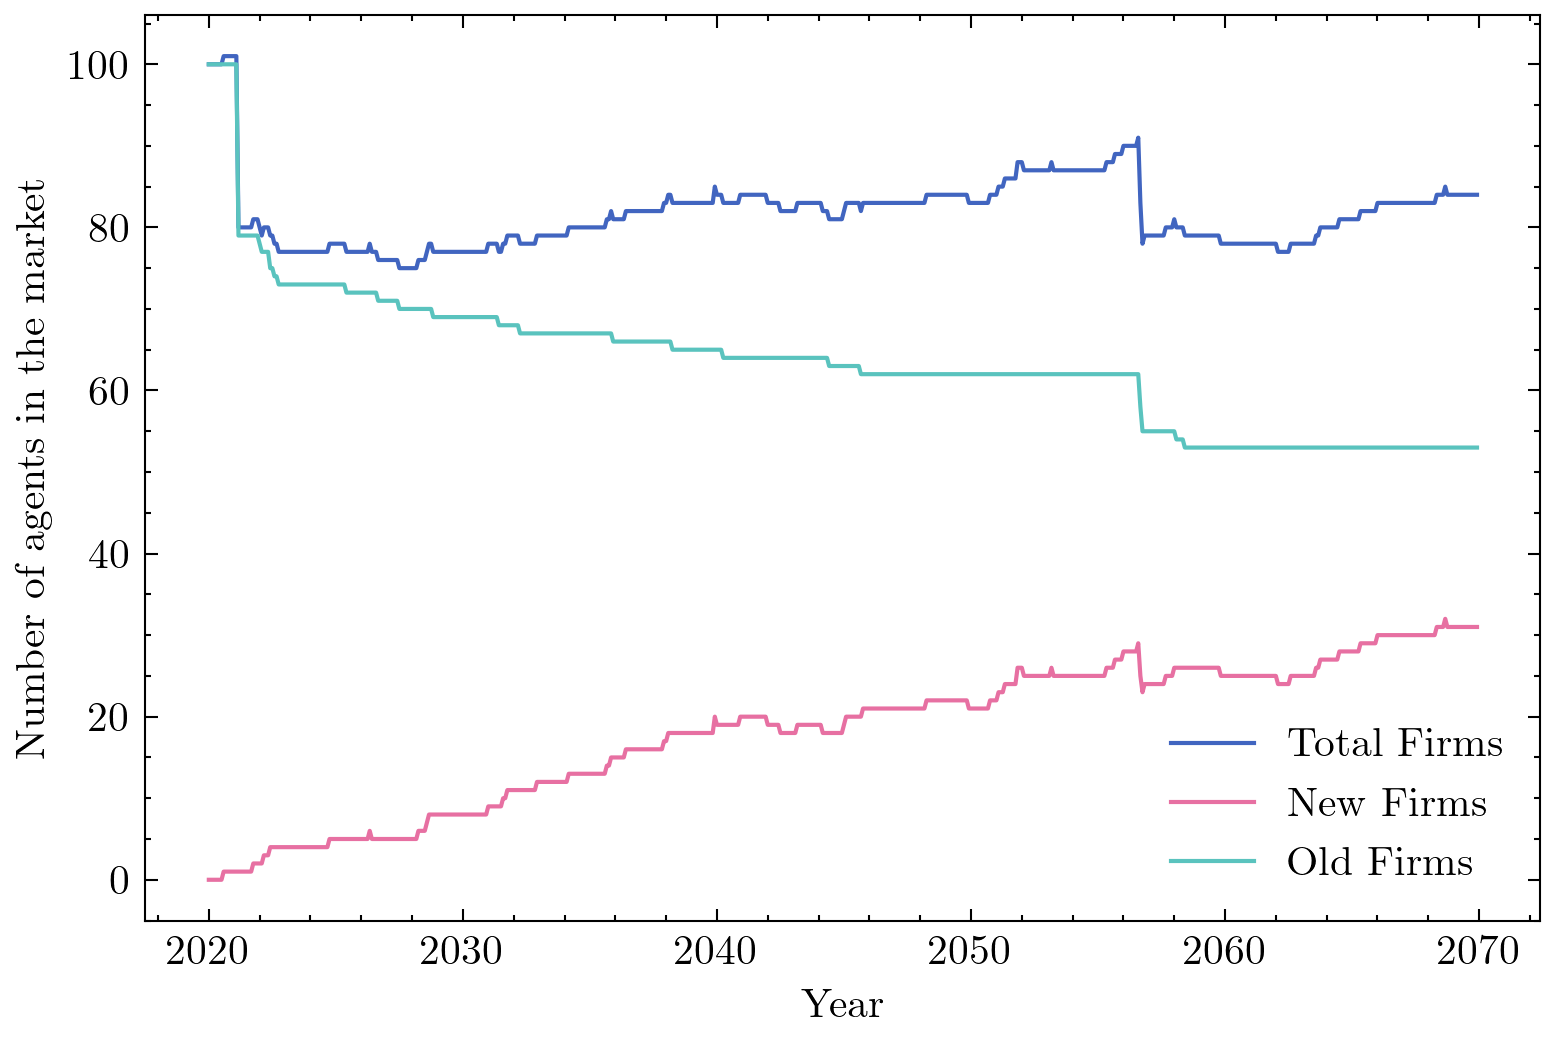

In [17]:
plt.figure(num=None, figsize=(6, 4), dpi=300)
plt.plot(x_lin,model_df.agents, label = 'Total Firms')
plt.plot(x_lin,new_agents, label = 'New Firms')
plt.plot(x_lin,model_df.agents - new_agents, label = 'Old Firms')
# plt.savefig('../Writing/Mid-term/Images/Recession/FirmsRec.pdf')
plt.xlabel("Year")
plt.ylabel("Number of agents in the market")
plt.legend()
# plt.savefig('../Writing/My_Thesis/Chapters//ModelVerification/Images/VerMulVarYesNumFirms.pdf')
# plt.savefig('../Writing/My_Thesis/Chapters/Analysis/Images/NumFirmsBaseCase.pdf')

plt.show()

In [18]:
print("New firms 2045", new_agents[299])
print("New firms 2070", new_agents[599])
print("Old firms 2045", model_df.agents[299] - new_agents[299])
print("Old firms 2070", model_df.agents[599] - new_agents[599])
print("Average total agents", round(model_df.agents.mean(),2)) 

New firms 2045 18
New firms 2070 31
Old firms 2045 63
Old firms 2070 53
Average total agents 81.68


In [19]:
# model_df.head(50)

In [20]:
# agent_df[agent_df.AgentID == 92]

In [21]:
# agent_df

# Income

#### Plot the GDPs

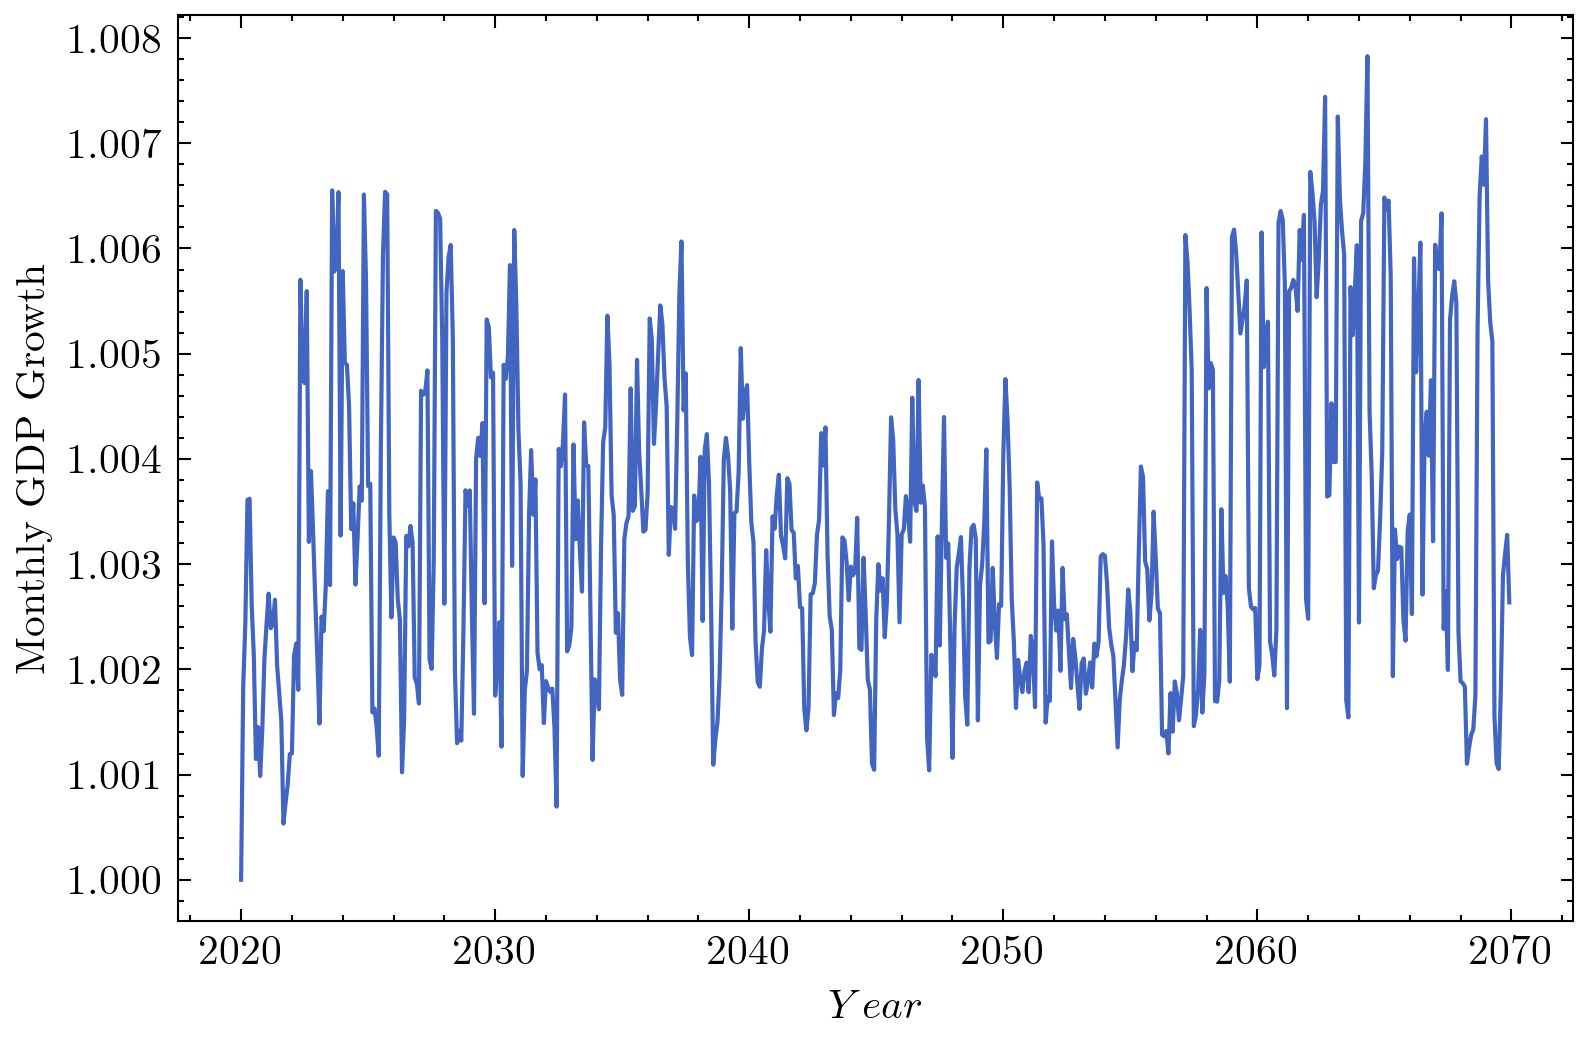

In [22]:
plt.figure(num=None, figsize=(6, 4), dpi=300)
plt.plot(x_lin,model_df.GDPGrowth)
plt.xlabel('$Year$')
plt.ylabel('Monthly GDP Growth')
# plt.savefig('../Writing/My_Thesis/Chapters/ModelVerification/Images/VerMulVarNoGDPgrowth.pdf')
plt.show()

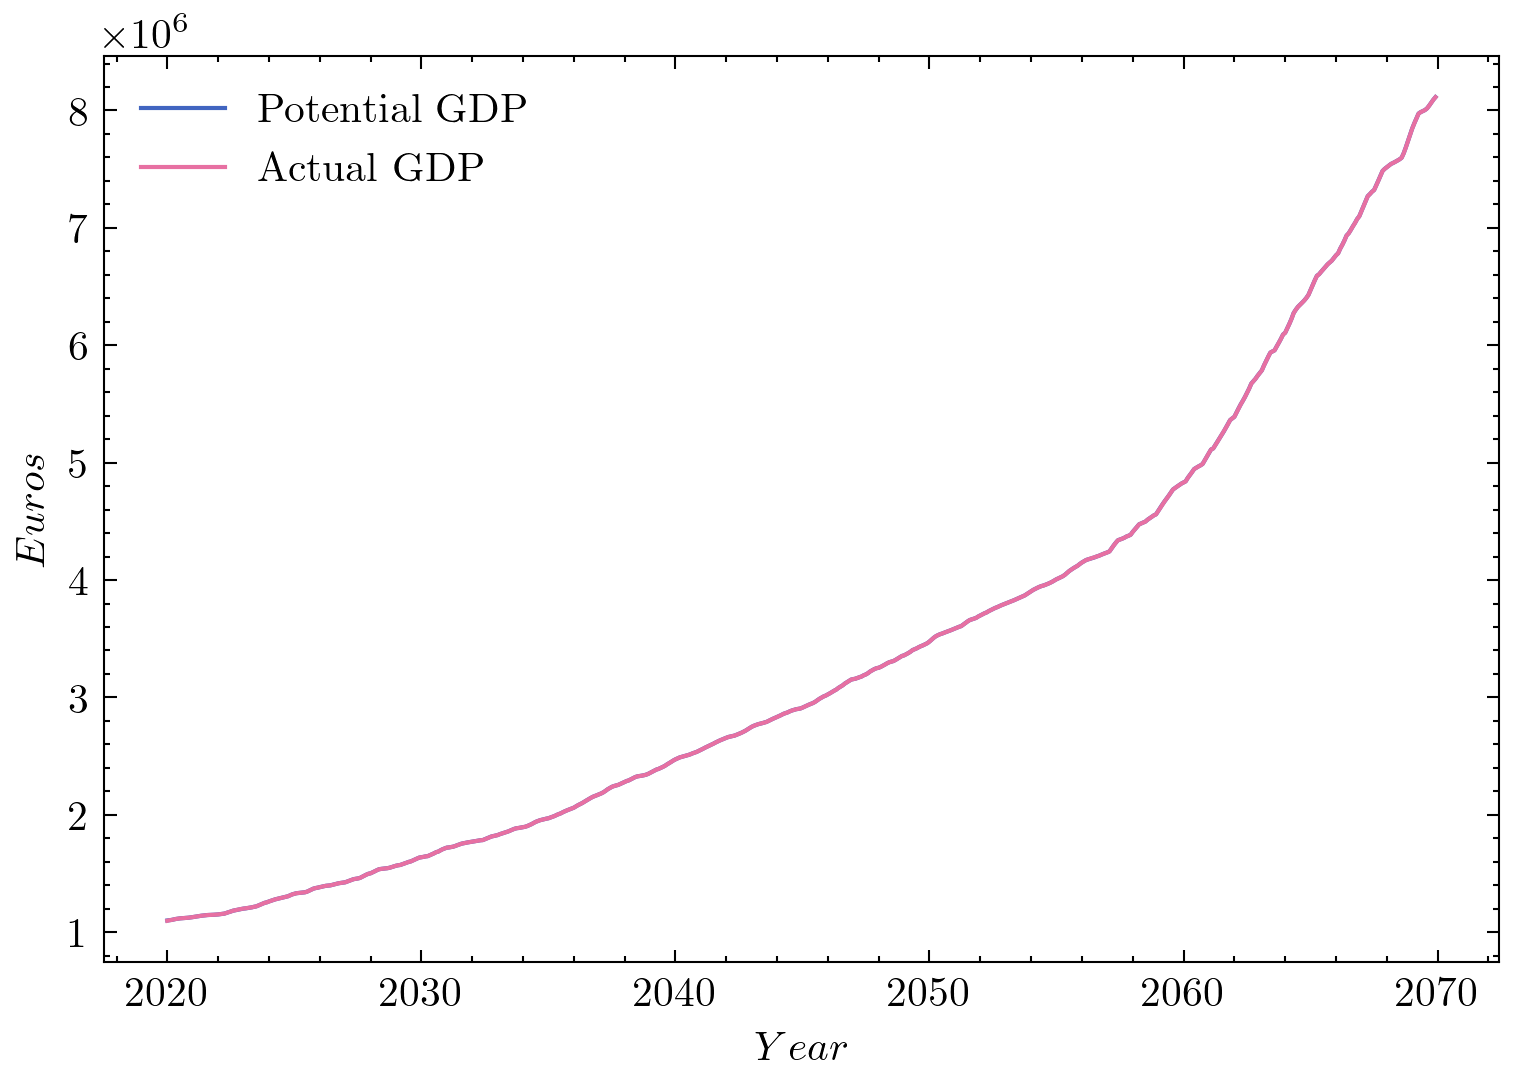

In [23]:
plt.figure(num=None, figsize=(6, 4), dpi=300)


pd.set_option('display.max_rows', None)
# model_df

plt.plot(x_lin,model_df.PotentialGDP, label = "Potential GDP")
# plt.plot(x_lin,model_df.LongTermGDP/1000, label = "Long Term GDP")
# plt.plot(x_lin,model_df.shortTermGDP/1000, label = "Short Term GDP")
plt.plot(x_lin,model_df.ActualGDP, label = "Actual GDP")
plt.xlabel("$Year$")
plt.ylabel("$Euros$")
plt.legend()
# plt.savefig('../Writing/My_Thesis/Chapters/Analysis/Images/GDPBaseCase.pdf')
# plt.savefig('../Writing/My_Thesis/Chapters/ModelVerification/Images/VerSinNoGDPs.pdf')
plt.show()

In [24]:
print("GDP in Millions",model_df.ActualGDP.iloc[-1]/1000000)

GDP in Millions 8.113053486102638


#### Some results

- Percentage of time that no project takes place.
- Percentage of time with negative wealth
- Mean wealth ratio


In [25]:
agent_df.proj.value_counts()/4

green         4600.00
False         2735.00
efficiency    2506.50
quality       2411.25
Name: proj, dtype: float64

In [26]:
vc = agent_df.proj.value_counts()

In [27]:
sum(vc)

49011

In [28]:
round(100*vc["green"]/(vc["green"]+vc["efficiency"]+vc["quality"]),2)

48.33

In [29]:
agent_df.proj.value_counts(normalize = True)[0]

0.22321519658852093

In [30]:
agent_df[agent_df.s_fs<0].s_fs.count()/agent_df.shape[0]

0.005631388871885903

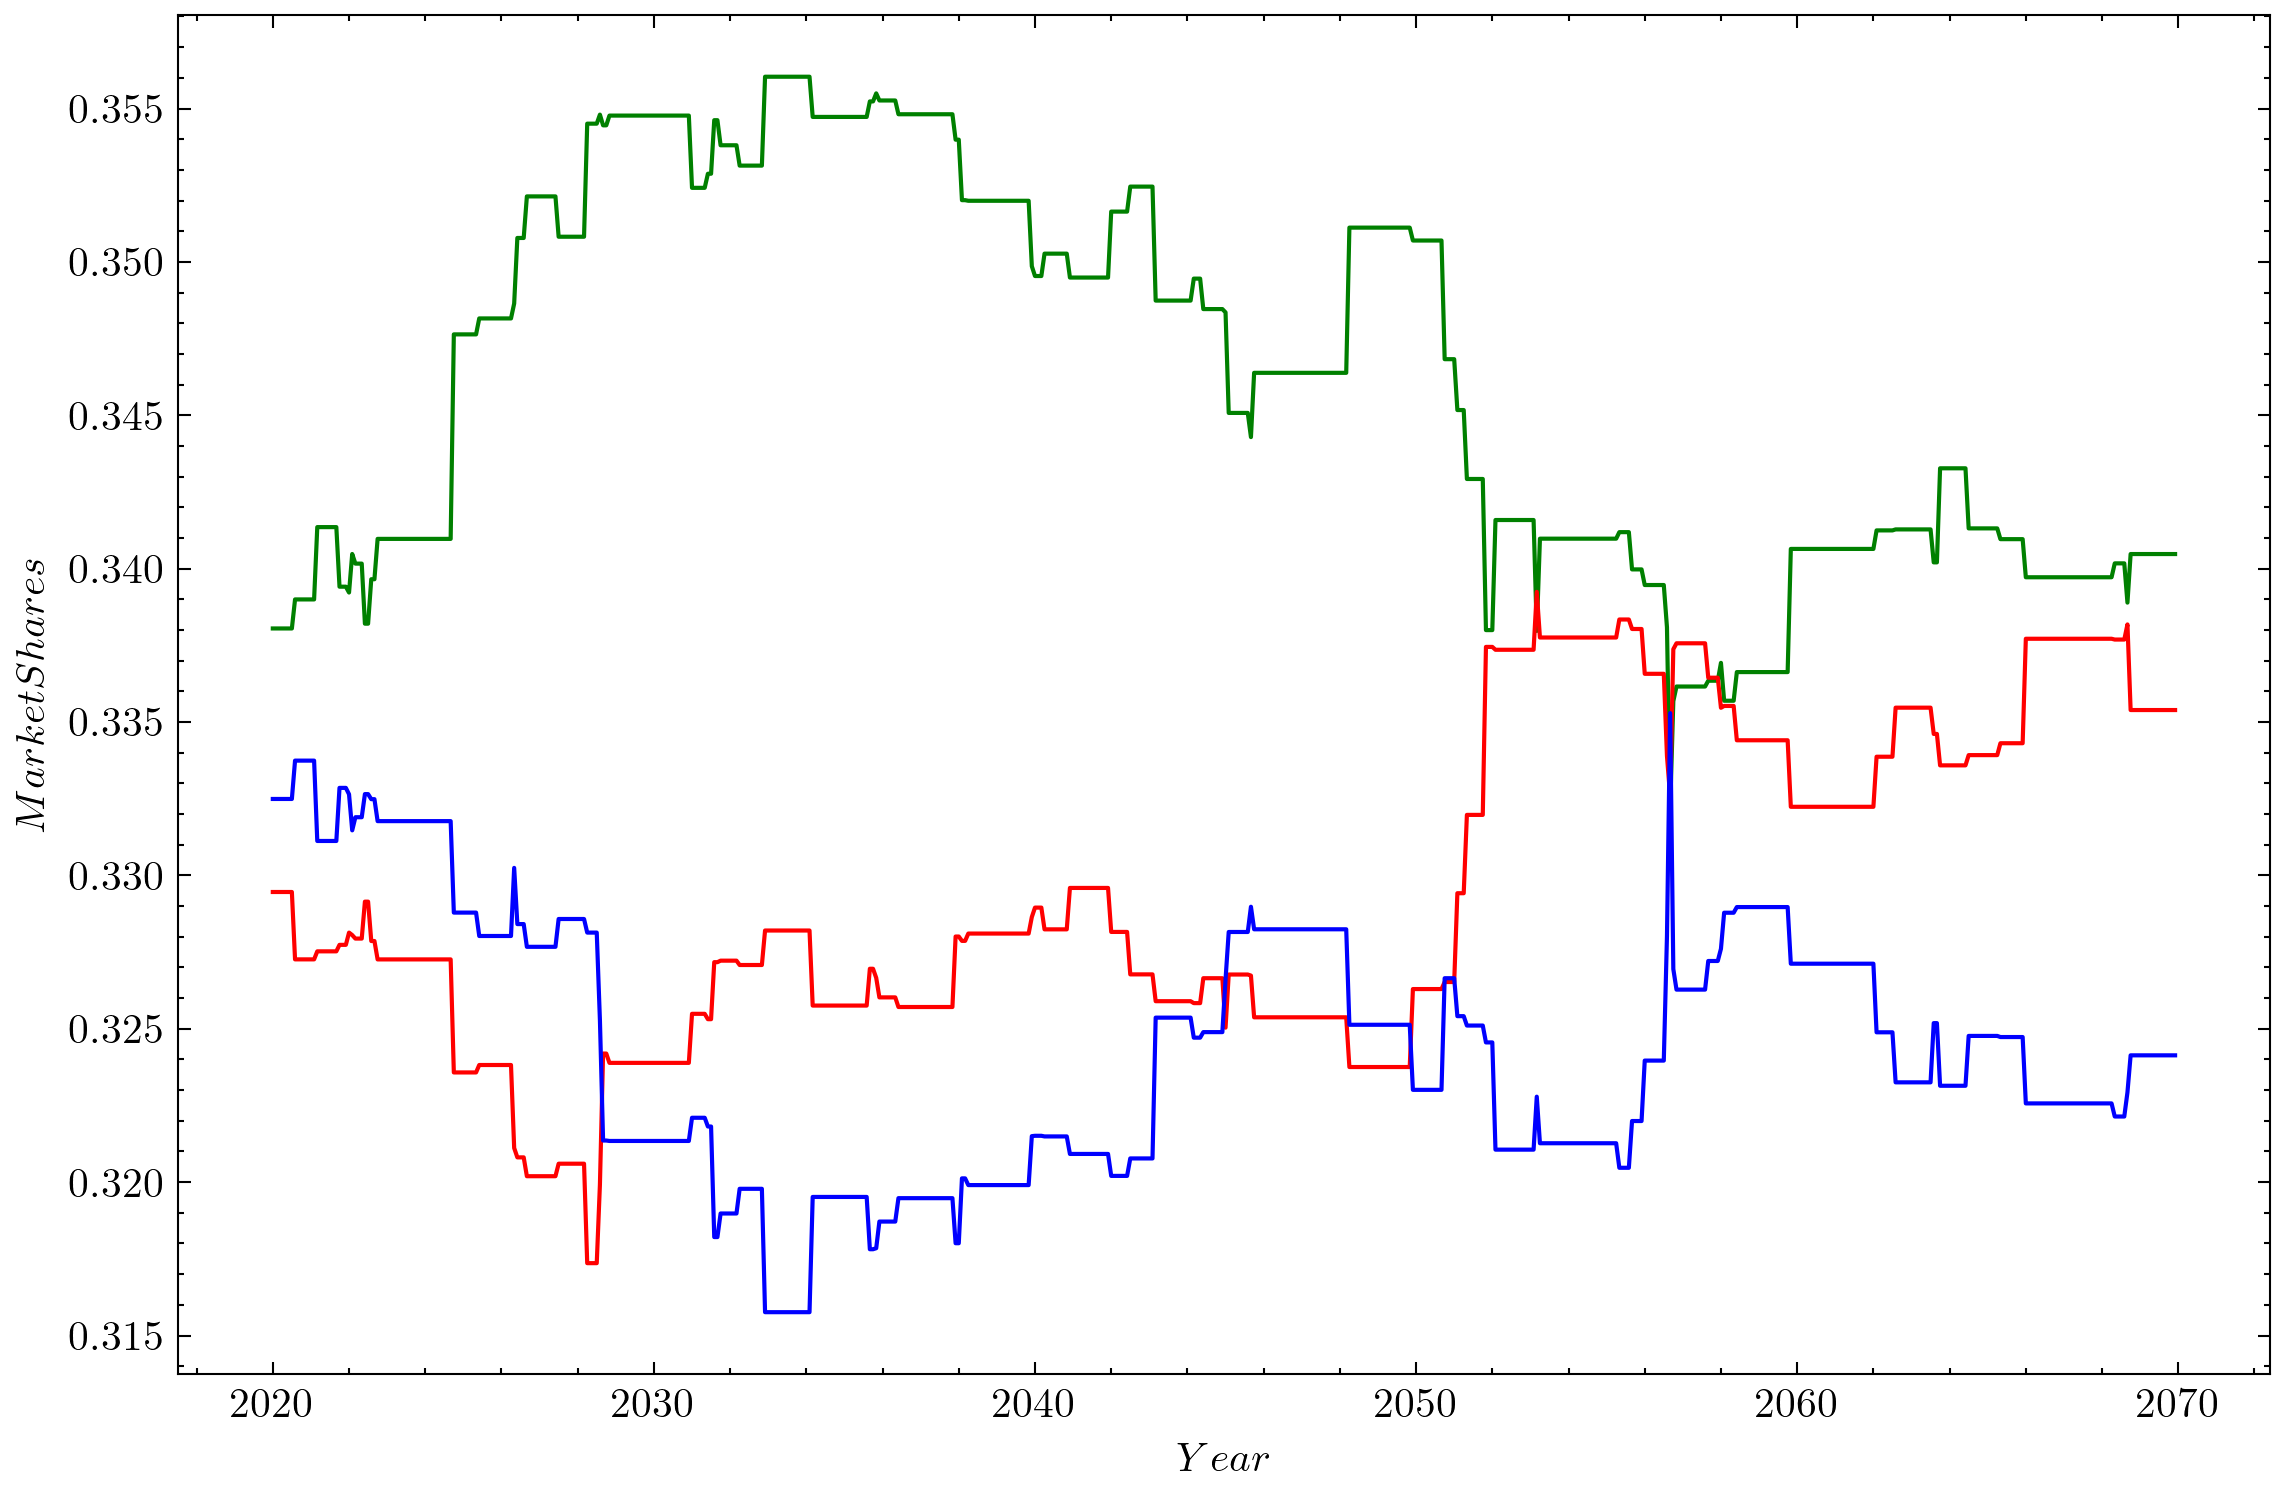

In [31]:
import matplotlib

fig= plt.figure(figsize=(9,6), dpi = 300)

plt.plot([i/12+2020 for i in range(600)],
             agent_df.groupby(['step']).green.mean(),'g', label = 'Environmental Performance')
plt.plot([i/12+2020 for i in range(600)],
             agent_df.groupby(['step']).efficiency.mean(),'r', label = 'Efficiency' )
plt.plot([i/12+2020 for i in range(600)],
             agent_df.groupby(['step']).quality.mean(),'b', label = 'User Quality')

plt.xlabel("$Year$")
plt.ylabel("$Market Shares$")
plt.show()

In [32]:
agent_df.head()

Step  AgentID  name       e_fs        p_fs       b_fs       g_fs      I_fs  \
0     1        0     0   9.615969  326.699464   7.155557  10.297975  8.915166   
1     1        1     1   8.227892  340.070599  10.715626   8.797928  9.188166   
2     1        2     2   7.807480  344.443462  10.081469   8.106639  8.609115   
3     1        3     3  12.079369  305.857795   7.477873  10.031477  9.676740   
4     1        4     4   7.762960  344.916828  10.580472   8.356072  8.820872   

      ms_fs         r_fs        c_fs      f_c_fs       π_fs       s_fs  step  \
0  0.000316   346.293321  272.249554   51.943998   5.771555  19.238518     1   
1  0.000577   633.040886  283.392166   94.956133  10.550681  35.168938     1   
2  0.000157   172.196798  287.036218   25.829520   2.869947   9.566489     1   
3  0.001626  1784.169900  254.881496  267.625485  29.736165  99.120550     1   
4  0.000255   279.953116  287.430690   41.992967   4.665885  15.552951     1   

    proj  p_success    s_to_r     green  efficiency   quality  p_r_imits  age  \
0  False        0.0  0.055556  0.317804    0.342884  0.339312   0.000634    0   
1  False        0.0  0.055556  0.346187    0.286800  0.367013   0.001059    0   
2  False        0.0  0.055556  0.291073    0.347778  0.361149   0.000350    0   
3  False        0.0  0.055556  0.305445    0.296742  0.397812   0.002555    0   
4  False        0.0  0.055556  0.367092    0.301039  0.331868   0.000529    0   

  innov  sum_of_innov  
0  none           1.0  
1  none           1.0  
2  none           1.0  
3  none           1.0  
4  none           1.0

### Firms survived in the end

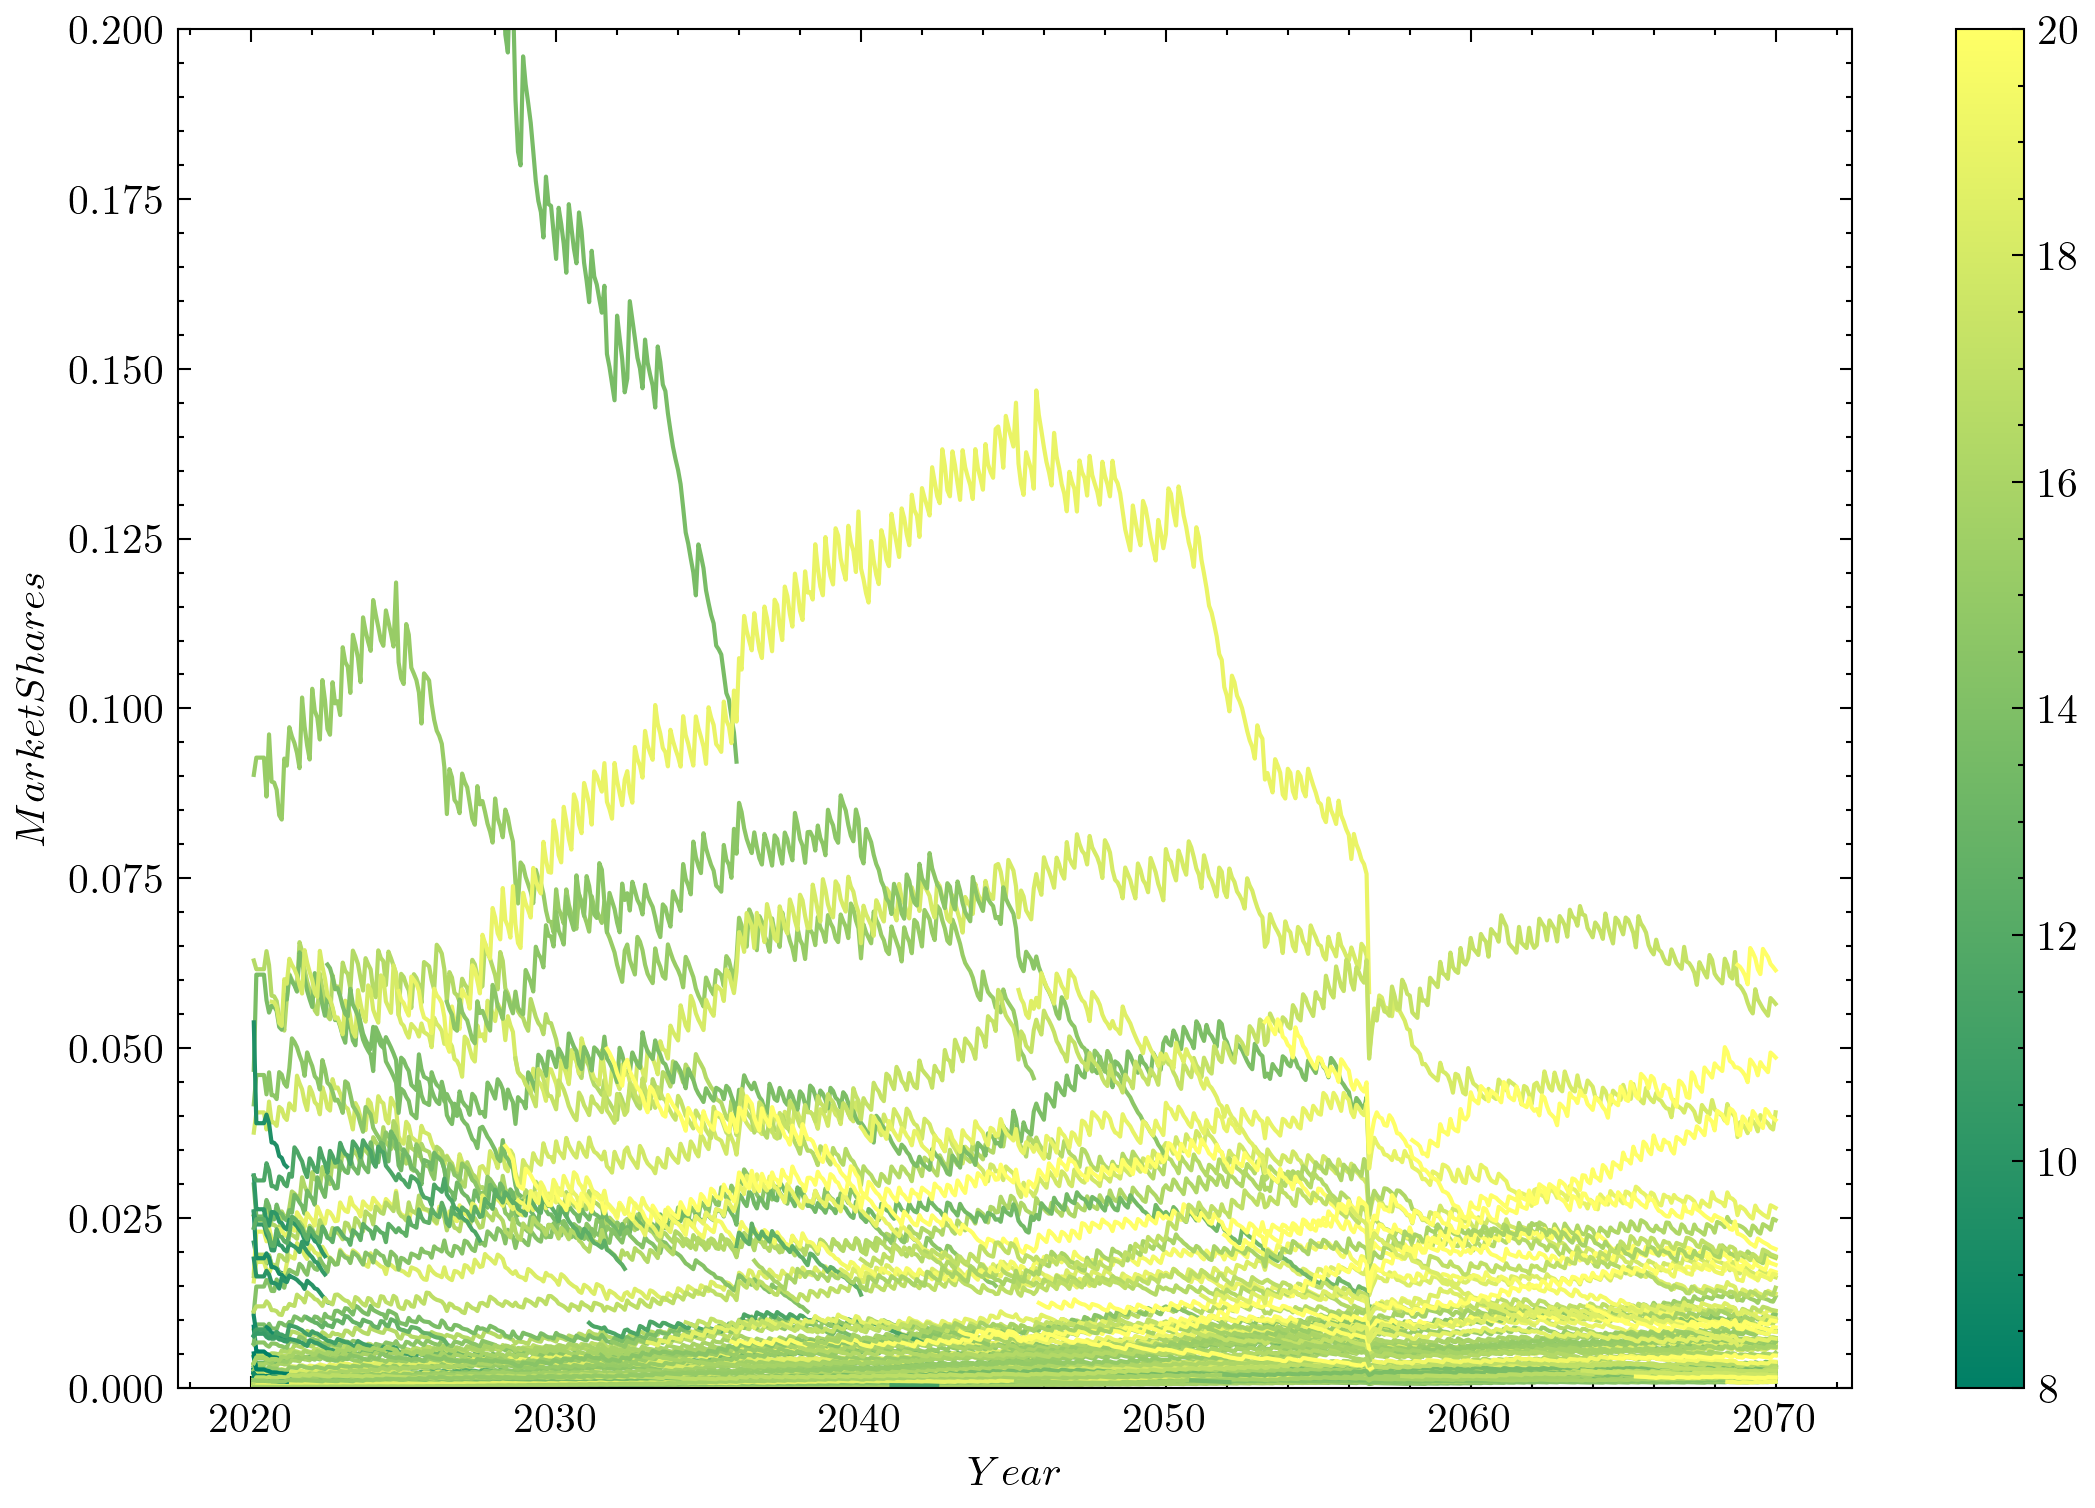

In [33]:
import matplotlib

min_gfs = 8
max_gfs = 30

fig= plt.figure(figsize=(9,6), dpi = 300)

norm = matplotlib.colors.Normalize(vmin=8,vmax=20)

# choose a colormap
c_m = matplotlib.cm.summer

# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])

for i in agent_df.name.unique():  
    # clr = 'b'
    # if i > 0:
        # clr = 'g'
    plt.plot(agent_df[agent_df.name == i].step/12 + 2020,
             agent_df[agent_df.name == i].ms_fs
            , color=s_m.to_rgba(agent_df[agent_df.name == i].g_fs.mean())
            #  ,color = clr
            )

# having plotted the 11 curves we plot the colorbar, using again our
# ScalarMappable
plt.colorbar(s_m)
plt.ylim(0,0.2)
plt.xlabel("$Year$")
plt.ylabel("$Market Shares$")
# plt.legend()
# plt.savefig('../Writing/My_Thesis/Chapters/ModelResults/Images/MarketSharesBaseCase100Con.pdf')
# plt.savefig('../Writing/My_Thesis/Chapters/ModelVerification/Images/VerMulVarYesMar.pdf')
plt.show()

### Plot of market shares by different firms

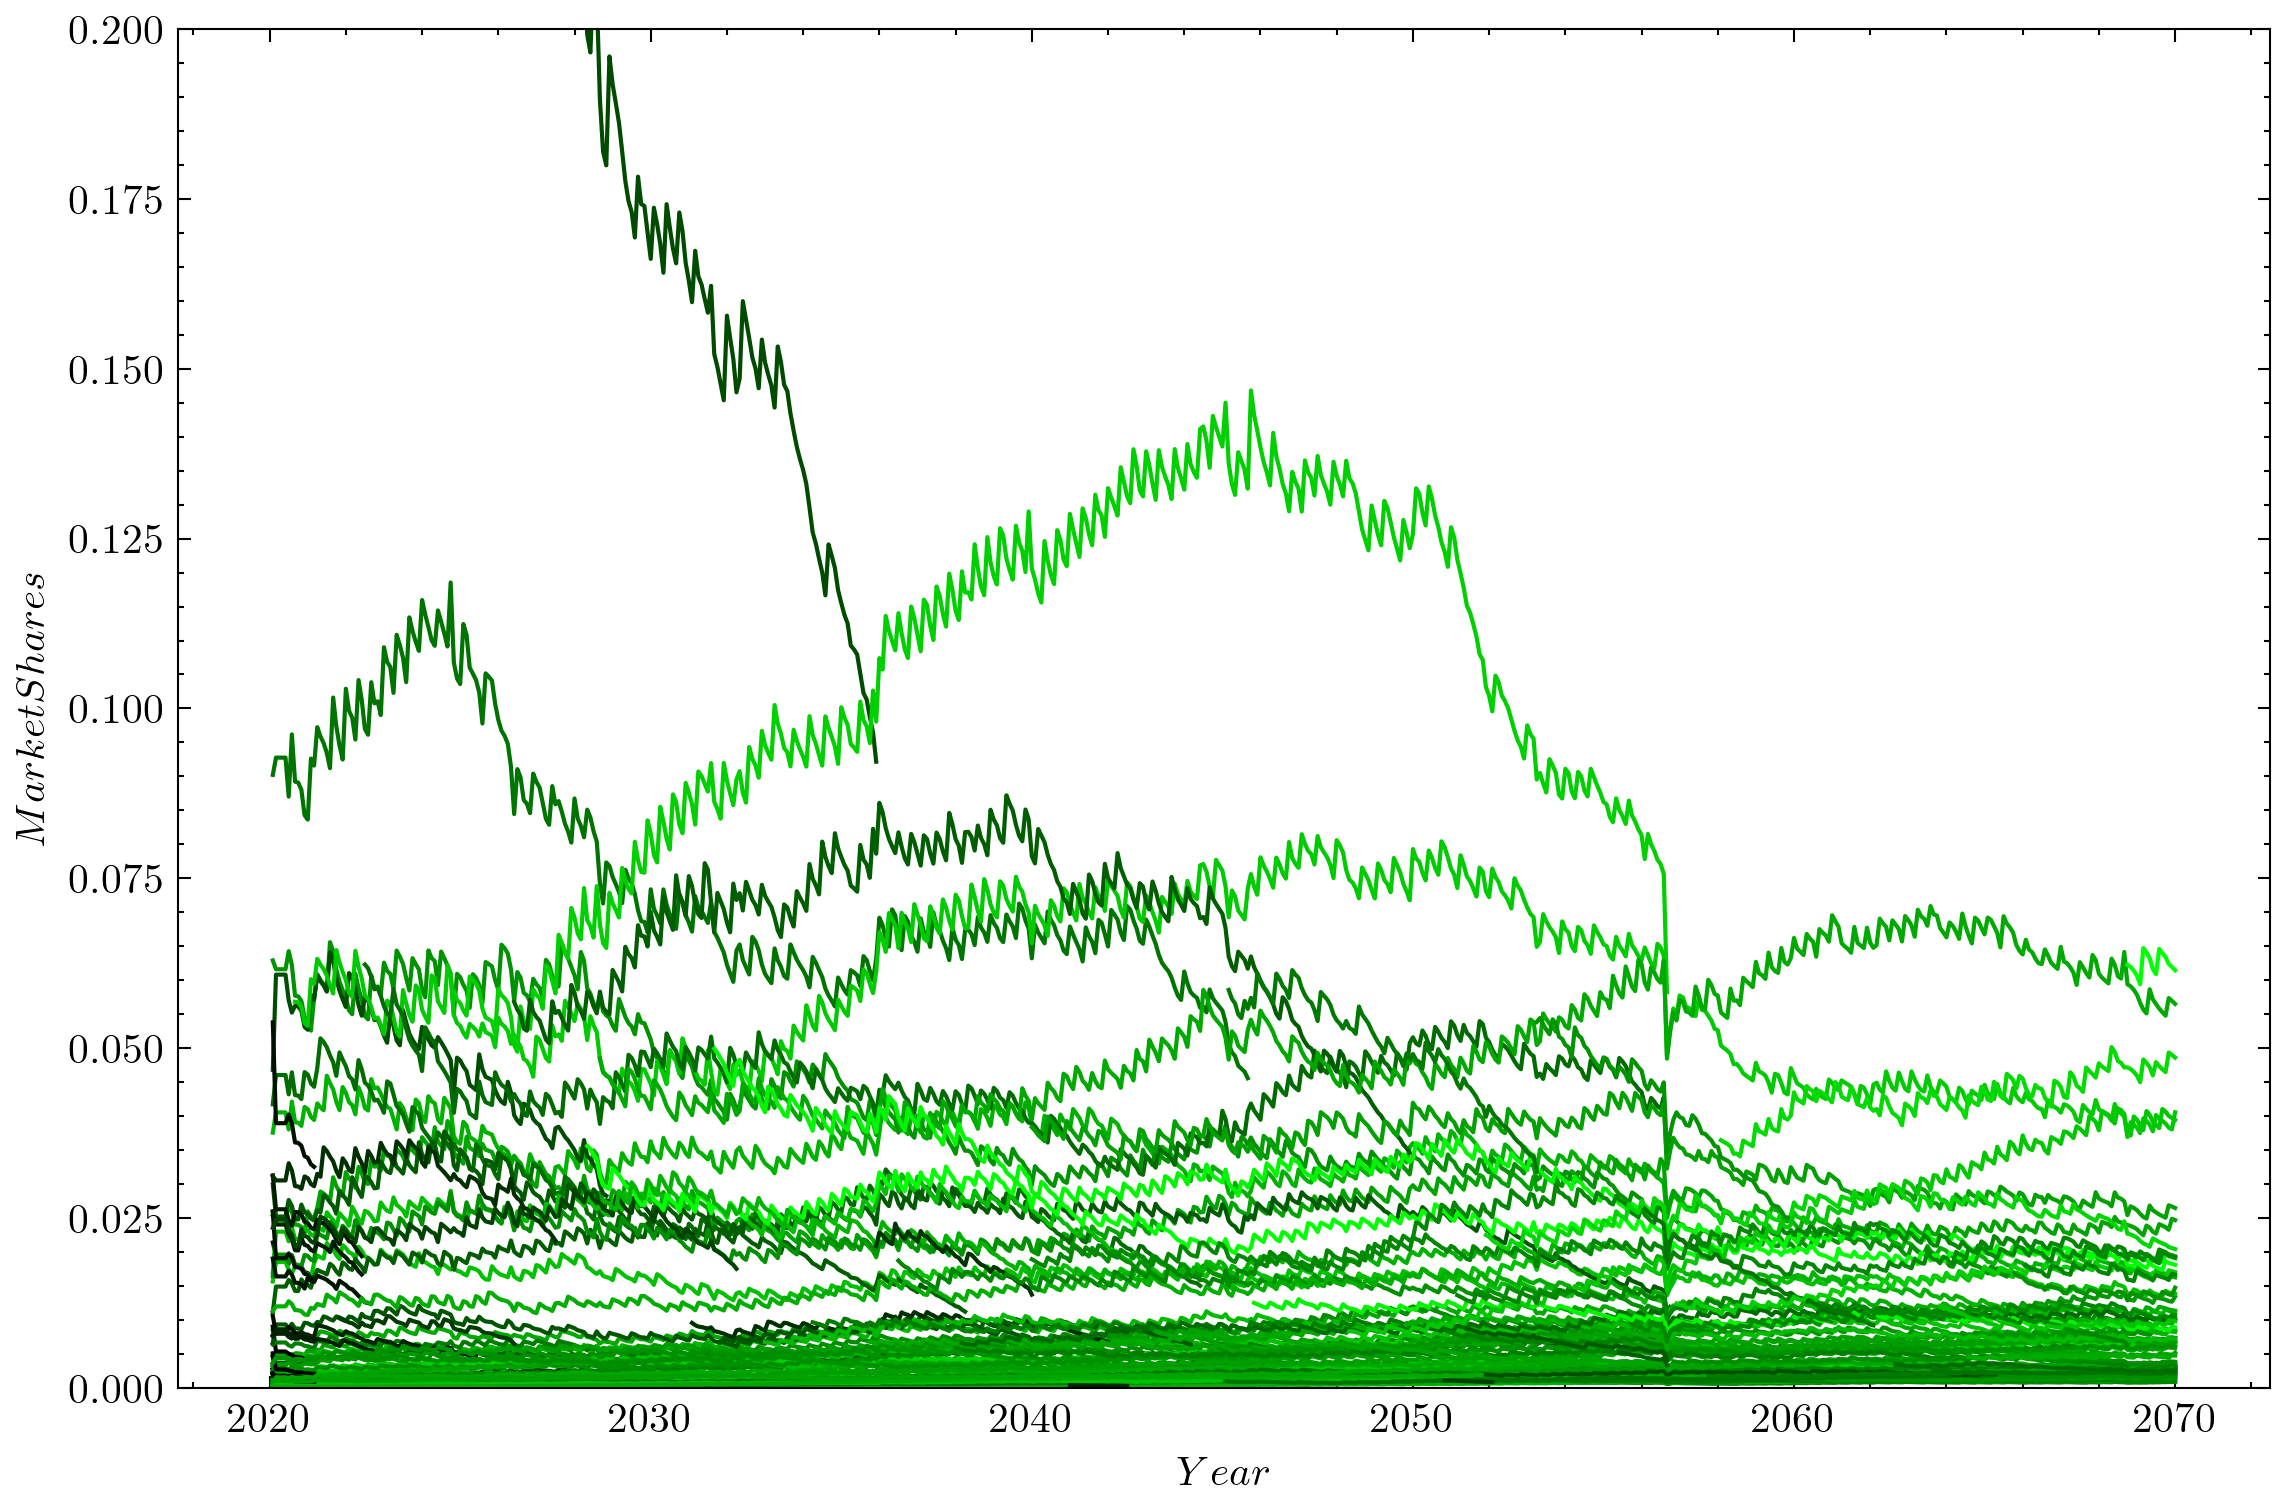

In [34]:
min_gfs = 8
max_gfs = 30

fig= plt.figure(figsize=(9,6), dpi = 300)

for i in agent_df.name.unique():
    color_gfs = (agent_df[agent_df.name == i].g_fs.max() - min_gfs)/(max_gfs-min_gfs)
    color_gfs = 1 if color_gfs > 1 else color_gfs
    color_gfs = 0 if color_gfs < 0 else color_gfs
    plt.plot(agent_df[agent_df.name == i].step/12 + 2020, agent_df[agent_df.name == i].ms_fs, label =   
    "Firm " + str(i),
    # c = [min(color_gfs*2,1),max(color_gfs*2-1,0),0])
    c = [0,min(max(color_gfs,0),1),0])
    # if i == 36:
    #      plt.plot(agent_df[agent_df.name == i].step, agent_df[agent_df.name == i].ms_fs, 'r')
    # )
plt.xlabel("$Year$")
plt.ylim(0,0.2)
plt.ylabel("$Market Shares$")
# # plt.legend()
# plt.savefig('../Writing/My_Thesis/Chapters/ModelVerification/Images/VerMulVarNoMar.pdf')
plt.show()


### Market Shares without Color Coding

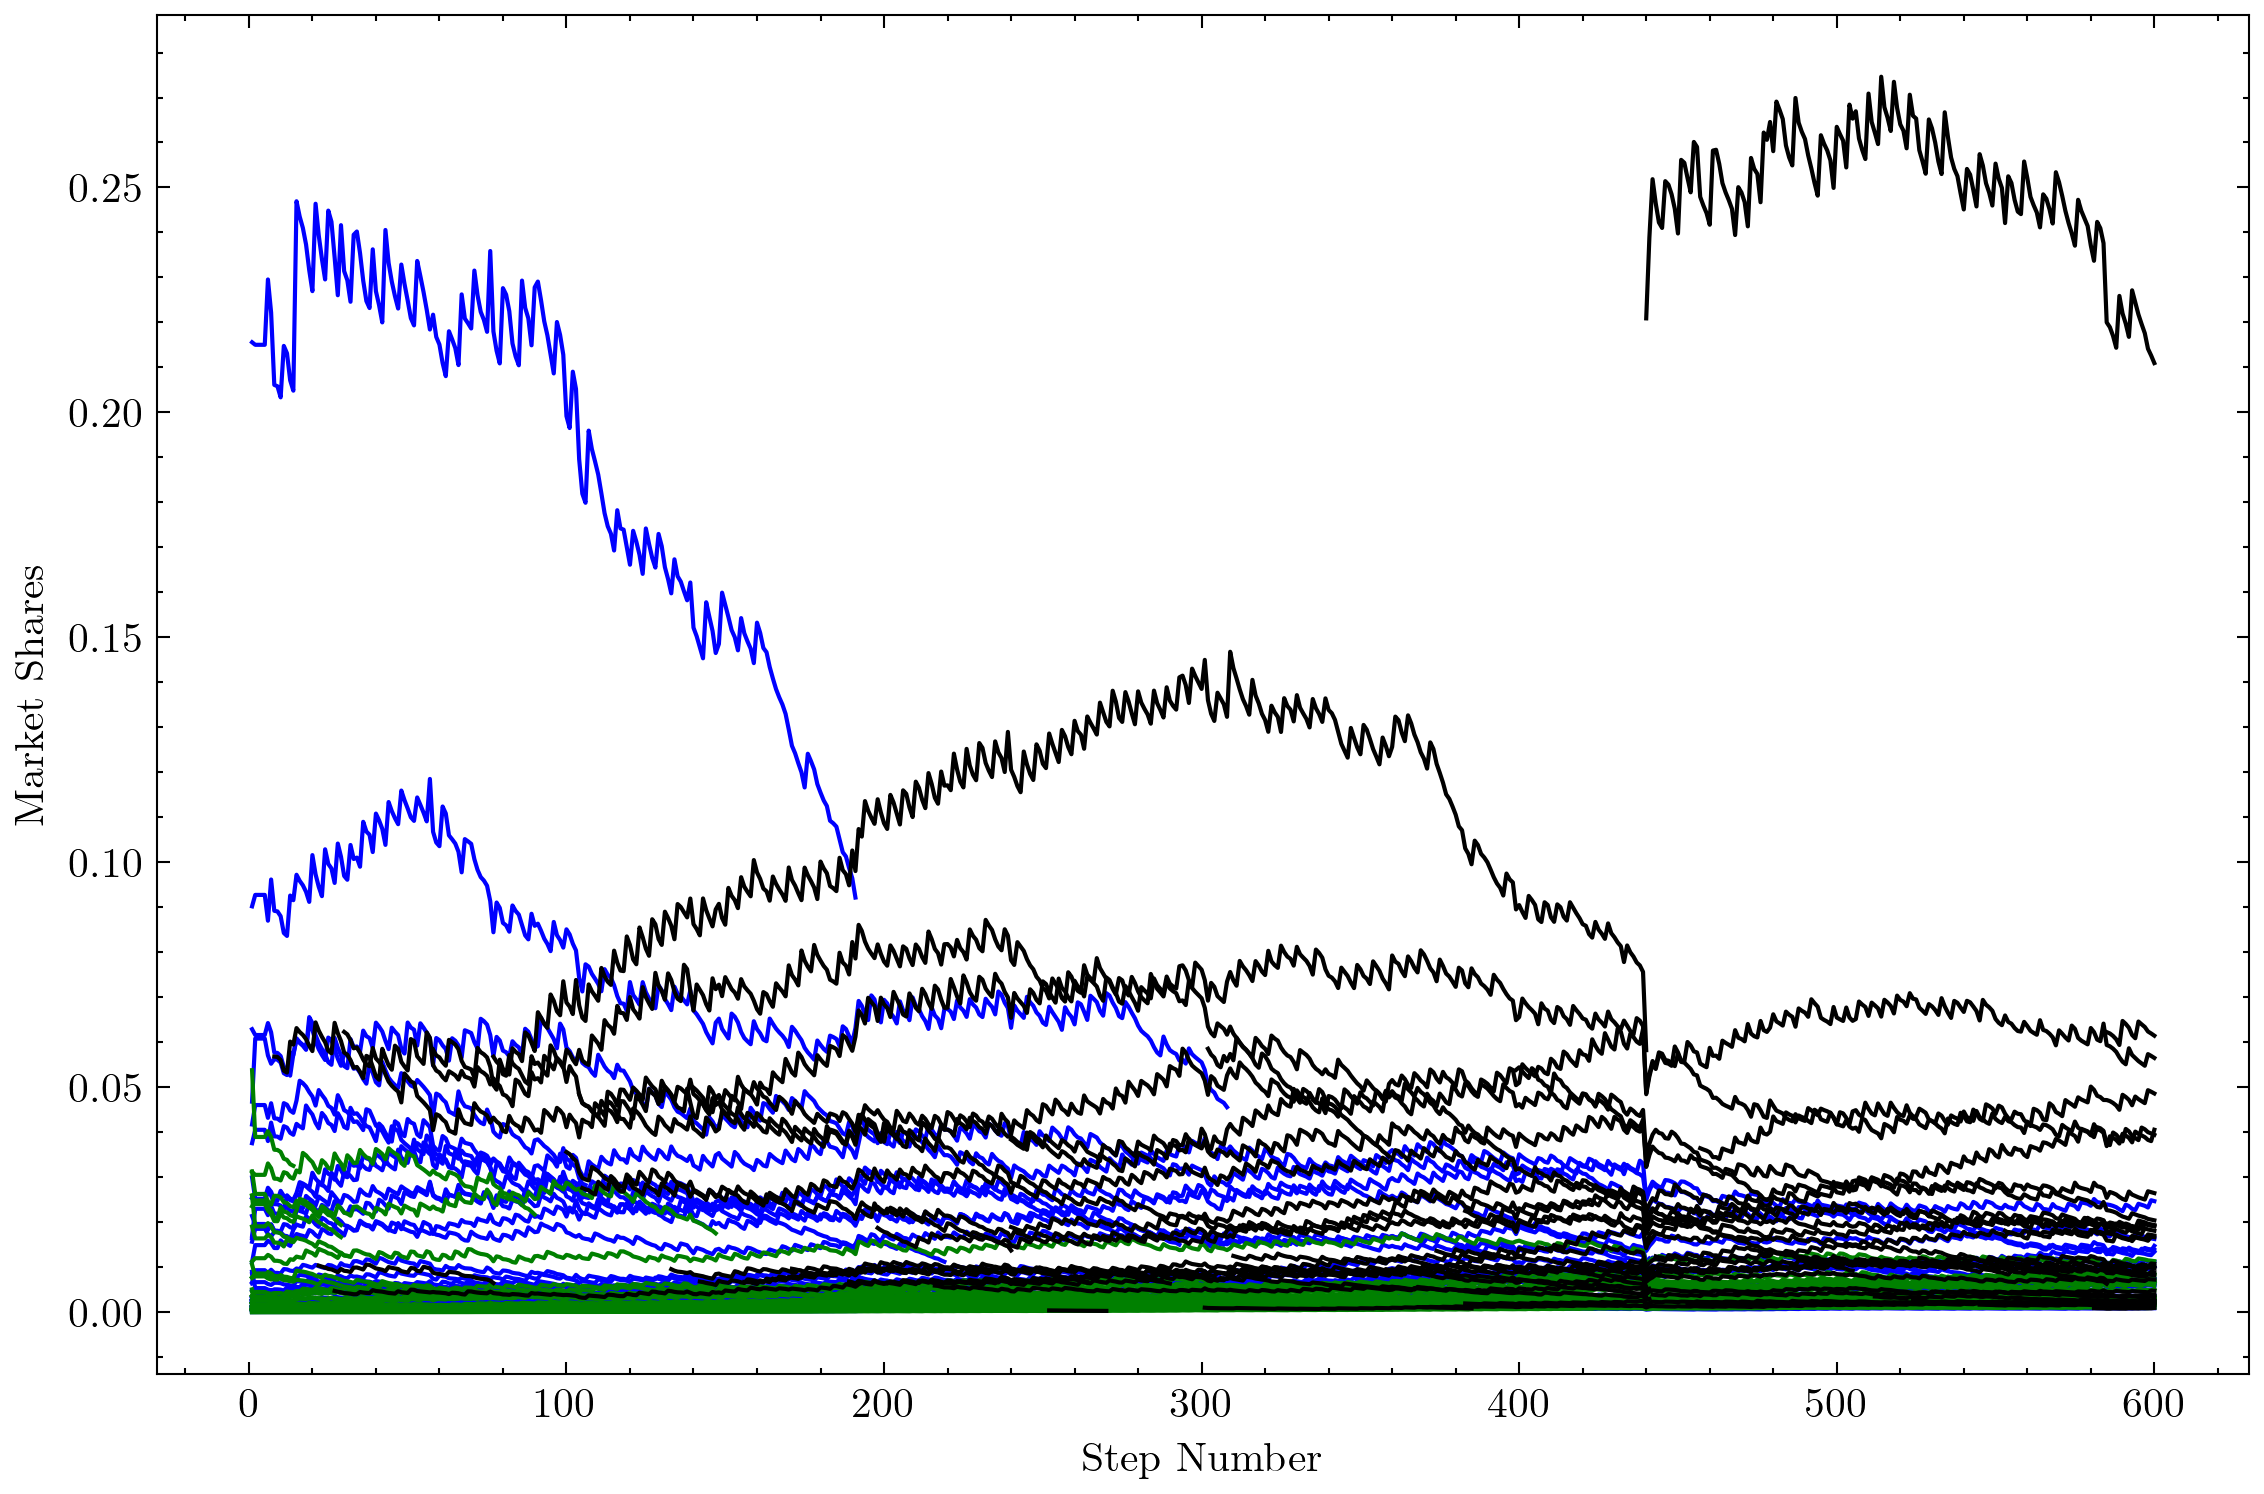

In [35]:
fig= plt.figure(figsize=(9,6), dpi = 300)
for i in agent_df.name.unique():
    # if i == 6:
        if i < 50:
             plt.plot(agent_df[agent_df.name == i].step, agent_df[agent_df.name == i].ms_fs, 'b')
        elif i <100:
             plt.plot(agent_df[agent_df.name == i].step, agent_df[agent_df.name == i].ms_fs, 'g')
            # plt.plot(agent_df[agent_df.name == i].step, agent_df[agent_df.name == i].ms_fs, label = "Firm " + str(i)
        else:
             plt.plot(agent_df[agent_df.name == i].step, agent_df[agent_df.name == i].ms_fs, 'k')
            
    

plt.xlabel("Step Number")
plt.ylabel("Market Shares ")
# plt.savefig('../Writing/My_Thesis/Chapters//ModelVerification/Images/VerMulVarYesMar.pdf')
plt.show()

### Average Qualities During the Model Run

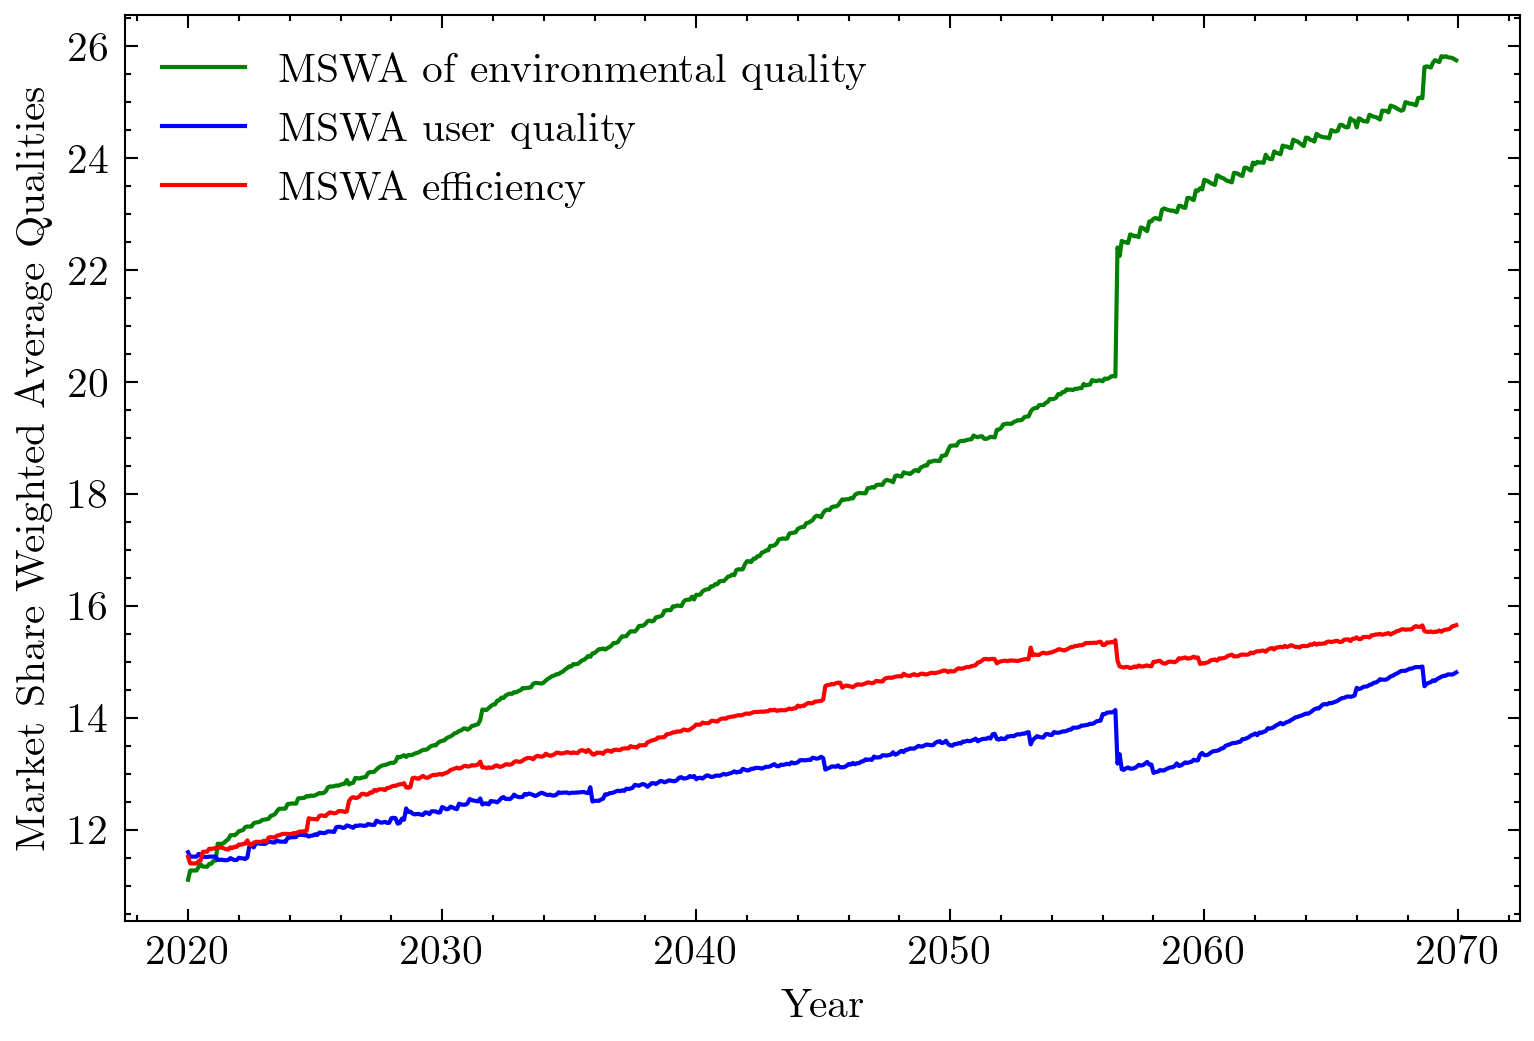

In [36]:
fig= plt.figure(figsize=(6,4), dpi = 300)
green = [] ; quality = [] ; efficiency = []
green2 = [] ; quality2 = [] ; efficiency2 = []
for i in agent_df.step.unique():
    # if i%10 ==0:
    green.append(sum(agent_df[agent_df.step == i].g_fs*agent_df[agent_df.step == i].ms_fs))
    quality.append(sum(agent_df[agent_df.step == i].b_fs*agent_df[agent_df.step == i].ms_fs))
    efficiency.append(sum(agent_df[agent_df.step == i].e_fs*agent_df[agent_df.step == i].ms_fs))
    green2.append(agent_df[agent_df.step == i].g_fs.mean())
    quality2.append(agent_df[agent_df.step == i].b_fs.mean())
    efficiency2.append(agent_df[agent_df.step == i].e_fs.mean())

    

plt.plot(x_lin,green, 'g', label = "MSWA of environmental quality" )
plt.plot(x_lin,quality, 'b', label = "MSWA user quality" )
plt.plot(x_lin,efficiency, 'r', label = "MSWA efficiency" )
# plt.plot(x_lin,green2, label = "Average environmental quality" )
# plt.plot(x_lin,quality2, label = "Average user quality" )
# plt.plot(x_lin,efficiency2, label = "Average efficiency" )

plt.xlabel("Year")
plt.ylabel("Market Share Weighted Average Qualities ")

plt.legend()
# plt.savefig('../Writing/My_Thesis/Chapters//ModelVerification/Images/VerMulYesConYesQual.pdf')
# plt.savefig('../Writing/My_Thesis/Chapters/ModelResults/Images/AvgQualBaseCase100Con.pdf')
# plt.savefig('../Writing/My_Thesis/Chapters/Analysis/Images/AvgQualBaseCase.pdf')

plt.show()

In [37]:
print(round(green[-1],2))
print(round(quality[-1],2))
print(round(efficiency[-1],2))


25.75
14.81
15.66


In [38]:
print('green',round(green[0],2),round(green[299],2),round(green[-1],2))
print('quality',round(quality[0],2),round(quality[299],2),round(quality[-1],2))
print('efficiency',round(efficiency[0],2),round(efficiency[299],2),round(efficiency[-1],2))

green 11.11 17.59 25.75
quality 11.6 13.3 14.81
efficiency 11.52 14.3 15.66


In [39]:
model_df.MSWA_g.iloc[299]

17.58587204990833

In [40]:
len(green)

600

In [41]:
for i in range(d_steps):
    if green[i] > 20:
        print(2020+i/12)
        break
for i in range(d_steps):
    if green[i] > 30:
        print(2020+i/12)
        break

2055.5833333333335


# Costs

## Cost of public procurement

In [42]:
# pp, λ_start , λ_dur
temp_pp = policies[act_policies]['pp'] 
temp_λ_start = policies[act_policies]['λ_start'] 
temp_λ_dur = policies[act_policies]['λ_dur'] 
temp_λ_off = policies[act_policies]['λ_off'] 
total_cost = 0 
for i in range(temp_λ_dur+temp_λ_off):
    if i < temp_λ_dur:
        total_cost += model_df.iloc[i+temp_λ_start].ActualGDP*temp_pp/100
    else:
        total_cost += model_df.iloc[i+temp_λ_start].ActualGDP*temp_pp/100*(1-1/temp_λ_off*(i-temp_λ_dur+1))
print(total_cost/1000/1000000)

0.20120097728969583


## Cost of loan guarantees

In [43]:
agent_df.tail()

Step  AgentID  name       e_fs        p_fs       b_fs       g_fs  \
49006   600      144   144  13.673343  293.675589  13.148197  22.860341   
49007   600      145   145  16.401475  274.254197  11.188767  20.283287   
49008   600      146   146  15.639790  279.542182  20.704583  19.497060   
49009   600      147   147  12.022342  306.309304  14.762585  19.661290   
49010   600      148   148  13.801254  292.730142   9.540452  34.078220   

            I_fs     ms_fs           r_fs        c_fs        f_c_fs  \
49006  17.610002  0.004768   38680.471225  244.729657   5444.874456   
49007  16.649520  0.001553   12599.046864  228.545165   1824.069280   
49008  18.747335  0.016669  135236.558694  232.951818  19606.087603   
49009  16.253302  0.000959    7782.790734  255.257754   1035.786864   
49010  20.011413  0.061472  498722.031301  243.941785  74186.959526   

              π_fs          s_fs  step     proj  p_success    s_to_r  \
49006  1001.870749   2895.566240   600    green   0.667288  0.074859   
49007   275.771864    903.659067   600    green   0.650080  0.071724   
49008  2933.338846   8695.046408   600    green   0.580700  0.064295   
49009   261.344925    626.649398   600    False   0.710214  0.080517   
49010  8933.379024  33079.792395   600  quality   0.385154  0.066329   

          green  efficiency   quality  p_r_imits  age  innov  sum_of_innov  
49006  0.184625    0.360625  0.454750   0.006078   65  Green           1.0  
49007  0.312525    0.365705  0.321770   0.002343   55  Effic           1.0  
49008  0.237849    0.616981  0.145170   0.017614   47   Qual           1.0  
49009  0.377795    0.335544  0.286662   0.001556   19   Qual           1.0  
49010  0.231385    0.379563  0.389053   0.053407   15  Green           1.0

In [44]:
agent_df[agent_df.Step == d_steps].head()

Step  AgentID  name       e_fs        p_fs       b_fs       g_fs  \
48927   600        0     0  16.615969  272.779273  14.955557  19.697975   
48928   600        1     1  15.427892  281.028997  15.915626  20.397928   
48929   600        2     2  15.807480  278.370686  18.081469  17.306639   
48930   600        3     3  18.879369  257.478707  15.277873  21.231477   
48931   600        4     4  11.962960  306.780754  18.380472  20.756072   

            I_fs     ms_fs           r_fs        c_fs        f_c_fs  \
48927  17.211240  0.003016   24465.072086  227.316061   3775.401506   
48928  17.386680  0.003694   29966.547871  234.190831   4360.965752   
48929  17.063012  0.002536   20578.673151  231.975571   3053.505033   
48930  18.546036  0.013432  108974.591173  214.565589  15490.453595   
48931  16.930859  0.002171   17615.018370  255.650628   2694.457455   

              π_fs         s_fs  step        proj  p_success    s_to_r  \
48927   302.110508  1141.352666   600     quality   0.259755  0.046652   
48928   633.458893  2285.896944   600  efficiency   0.401319  0.076282   
48929   376.273826  1350.892339   600       green   0.654516  0.065645   
48930  2671.978268  7197.127229   600       False   0.335388  0.066044   
48931   241.378940   917.020902   600       False   0.522791  0.052059   

          green  efficiency   quality  p_r_imits  age innov  sum_of_innov  
48927  0.317804    0.342884  0.339312   0.004118  599  none           1.0  
48928  0.346187    0.286800  0.367013   0.004893  599  none           1.0  
48929  0.291073    0.347778  0.361149   0.003555  599  none           1.0  
48930  0.305445    0.296742  0.397812   0.014660  599  none           1.0  
48931  0.367092    0.301039  0.331868   0.003115  599  none           1.0

In [45]:
cnt = 0 
payback_period = 36 # in months 
per_loan = policies['base_scenario']['σ_g'] # percentage of loan to firms revenue
# dictionary containing the agents that have defaulted the number of loans taken 
# and the sum of money that they defaulted
loan_def = {}

for i in agent_df.AgentID.unique():
    # the next line picks the firms that have defaulted,
    # the agents that are not present in the end of the simulation run
    cnt_2 = 0
    cnt_3 = 0 # counting when the current project is done
    if i not in agent_df[agent_df.Step == d_steps].AgentID.unique():
        # create entry for that firm in the dictionary 
        loan_def[str(i)] = {"num":0,"sum":0}
        # get the last round the firm was active
        last_round = agent_df[agent_df.AgentID == i].Step.iloc[-1]
        # go through the agent's rows
        for index, row in agent_df[agent_df.AgentID == i].iloc[-payback_period:,:].iterrows(): 
            if row['proj'] != False:
                cnt_3 += 1
                if cnt_3 == 1: 
                    loan_def[str(i)]['num'] += 1
                    loan_def[str(i)]['sum'] += 0.5 * 0.095 * row['r_fs'] / 0.081 * per_loan * (payback_period-(last_round-row['step']))/payback_period
                if cnt_3 == 4:
                    cnt_3 = 0
total_sum = 0
for i in loan_def:
    total_sum += loan_def[i]['sum']

In [46]:
total_sum = 0
for i in loan_def:
    total_sum += loan_def[i]['sum']
print(total_sum/1000/1000000)

0.0016720088580123758


In [47]:
per_loan

0.8

In [48]:
loan_def

{'5': {'num': 3, 'sum': 1313.3285106272033},
 '6': {'num': 0, 'sum': 0},
 '8': {'num': 1, 'sum': 7012.187746126959},
 '14': {'num': 1, 'sum': 258.8137491111676},
 '15': {'num': 5, 'sum': 12913.861110540234},
 '16': {'num': 0, 'sum': 0},
 '17': {'num': 3, 'sum': 74224.97310992444},
 '18': {'num': 1, 'sum': 269.5294536951032},
 '20': {'num': 0, 'sum': 0},
 '24': {'num': 2, 'sum': 13070.098412362464},
 '27': {'num': 3, 'sum': 8213.568495623314},
 '31': {'num': 0, 'sum': 0},
 '32': {'num': 0, 'sum': 0},
 '33': {'num': 3, 'sum': 48515.92235216914},
 '34': {'num': 3, 'sum': 13893.06189419776},
 '35': {'num': 0, 'sum': 0},
 '37': {'num': 0, 'sum': 0},
 '40': {'num': 8, 'sum': 24597.446146375252},
 '41': {'num': 5, 'sum': 54010.590244962936},
 '44': {'num': 4, 'sum': 15118.389601277917},
 '45': {'num': 3, 'sum': 4066.0372092511616},
 '46': {'num': 5, 'sum': 55483.09505156009},
 '47': {'num': 3, 'sum': 144379.8640992053},
 '49': {'num': 3, 'sum': 7525.548509264583},
 '52': {'num': 2, 'sum': 131

In [49]:
# agent_df[agent_df.AgentID == 14].Step.iloc[-1]

In [50]:
# agent_df[agent_df.AgentID == 130]

#### Scatter plot of market share improvement and investment strategies

In [51]:
# df_green_ms = pd.DataFrame(columns=['green','efficiency','quality','ms_improvement'], index = agent_df.name.unique())
# for i in agent_df.name.unique():
#     df_green_ms.loc[i,"green"] = agent_df[agent_df.name == i].green.iloc[0]
#     df_green_ms.loc[i,"efficiency"] = agent_df[agent_df.name == i].efficiency.iloc[0]
#     df_green_ms.loc[i,"quality"] = agent_df[agent_df.name == i].quality.iloc[0]

#     df_green_ms.loc[i,"ms_improvement"] = agent_df[agent_df.name == i].ms_fs.iloc[-1] - agent_df[agent_df.name == i].ms_fs.iloc[0]


In [52]:
# fig= plt.figure(figsize=(9,6),dpi = 300)
# x = np.linspace(0,1,df_green_ms.ms_improvement.size)

# ag, bg = np.polyfit(df_green_ms.green.astype(float),df_green_ms.ms_improvement.astype(float), deg=1)
# y_green = ag * x + bg
# ae, be = np.polyfit(df_green_ms.efficiency.astype(float),df_green_ms.ms_improvement.astype(float), deg=1)
# y_efficiency = ae * x + be

# aq, bq = np.polyfit(df_green_ms.quality.astype(float),df_green_ms.ms_improvement.astype(float), deg=1)
# y_quality = aq * x + bq

# plt.scatter(df_green_ms.green,df_green_ms.ms_improvement, label = "green", color =  'g',alpha = 0.5)
# plt.plot(x,y_green, label = "y = {0:.5f}x + {0:.5f} ".format(ag,bg), color = 'g', linewidth = 1)

# plt.scatter(df_green_ms.efficiency,df_green_ms.ms_improvement, label = "efficiency", color = 'b',alpha = 0.5)
# plt.plot(x,y_efficiency, label = "y = {0:.5f}x + {0:.5f} ".format(ae,be) , color = 'b', linewidth = 1)

# plt.scatter(df_green_ms.quality,df_green_ms.ms_improvement, label = 'quality', color =  'r', alpha = 0.5)
# plt.plot(x,y_quality, label = "y = {0:.5f}x + {0:.5f} ".format(aq,bq), color = 'r', linewidth = 1)
# plt.legend()

# plt.ylim(-0.12,0.12)

# plt.ylabel("Market Share Improvement")
# plt.xlabel("Probability of investing in an aspect")


# plt.show()

## Model Validation
Based on the three validation tests done by D'Orazio and Valente. 



### Procyclical investments

Positive relationship between investment levels and GDP growth. 
Doesn't make so much sense to check that in my opinion as it can be derived directly out of equation 19. 
Additionally they don't define what exactly investment growth rate is. 
So I just confirm here that there is a positive relationship.

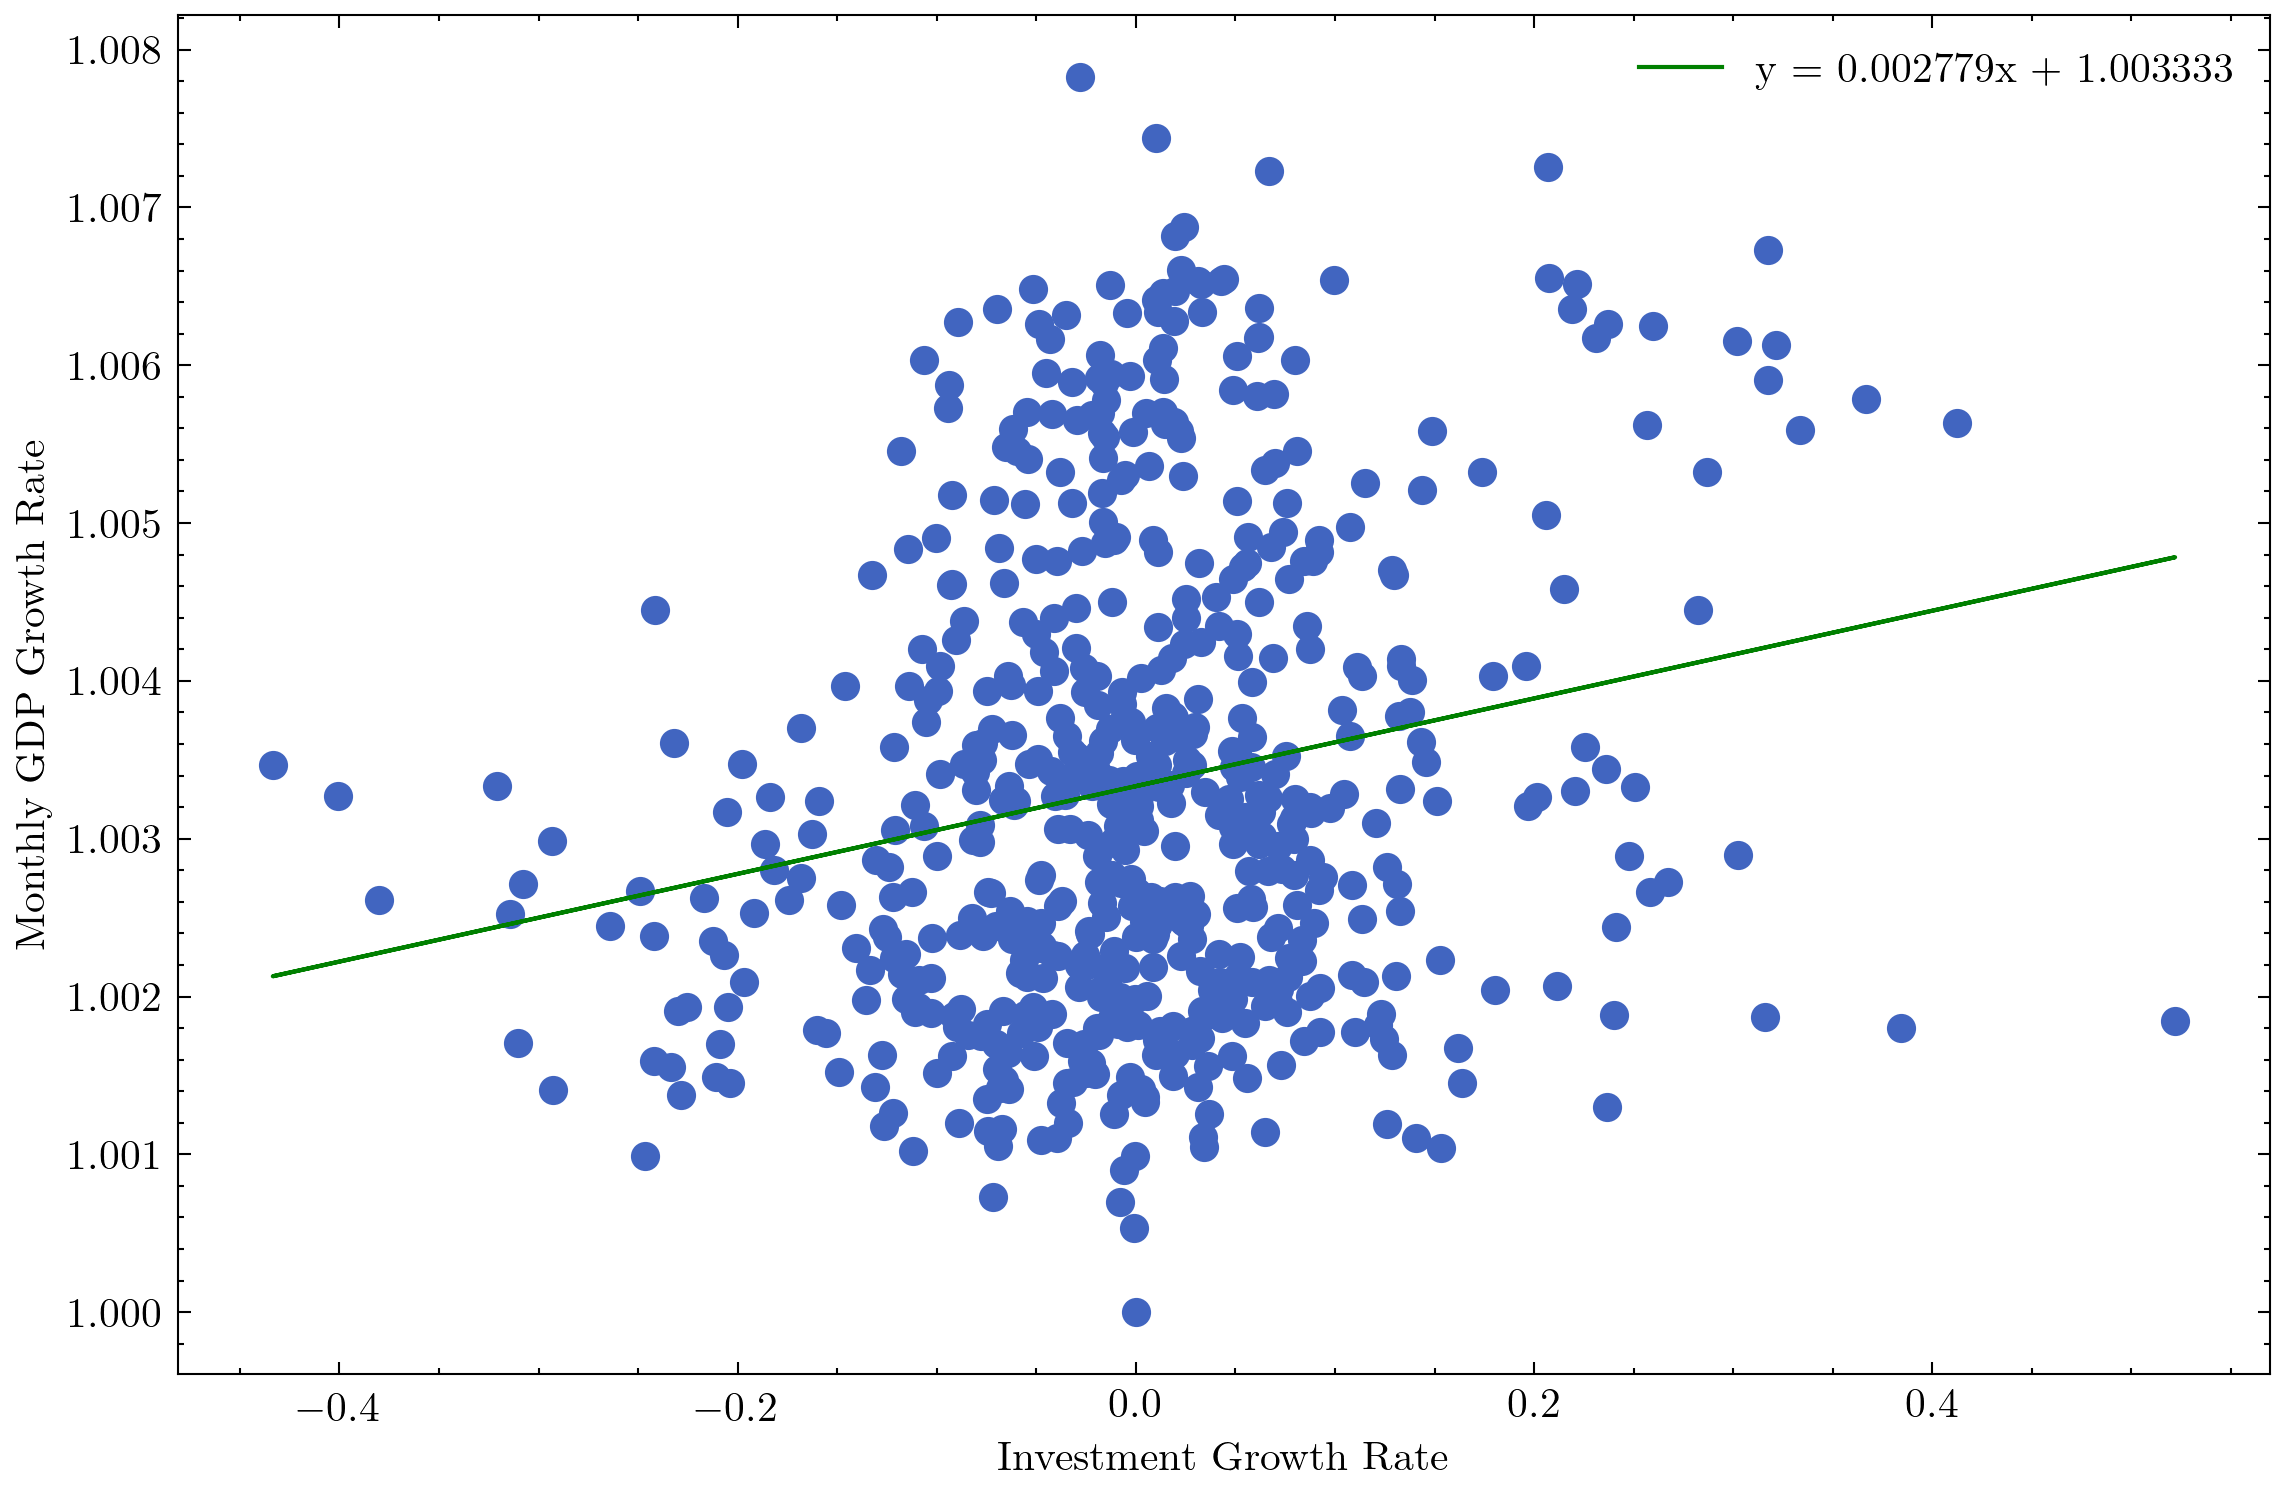

In [53]:

plt.style.use(['science','retro'])
plt.figure(num=None, figsize=(9,6 ), dpi=300)
model_df.head()
plt.scatter(model_df.InvestmentGrowth,model_df.GDPGrowth, label = 'quality')
# plt.xlim(-0.4,0.4)
a, b = np.polyfit(model_df.InvestmentGrowth,model_df.GDPGrowth, deg=1)
y = a * model_df.InvestmentGrowth + b
plt.plot(model_df.InvestmentGrowth,y,'g')
plt.xlabel('Investment Growth Rate')
plt.ylabel('Monthly GDP Growth Rate')
plt.legend(["y = " + str(round(a,6)) + "x + " + str(round(b,6))])

# plt.savefig('../Writing/My_Thesis/Chapters/ModelValidation/Images/Validation1.pdf')
plt.show()


### Firm's size distribution.

In [54]:
firms_gb = agent_df.groupby(['name'])
firms_gb2 = agent_df[agent_df.Step == d_steps]
market_shares = firms_gb[['ms_fs']].mean()
market_shares2 = firms_gb2[['ms_fs']]

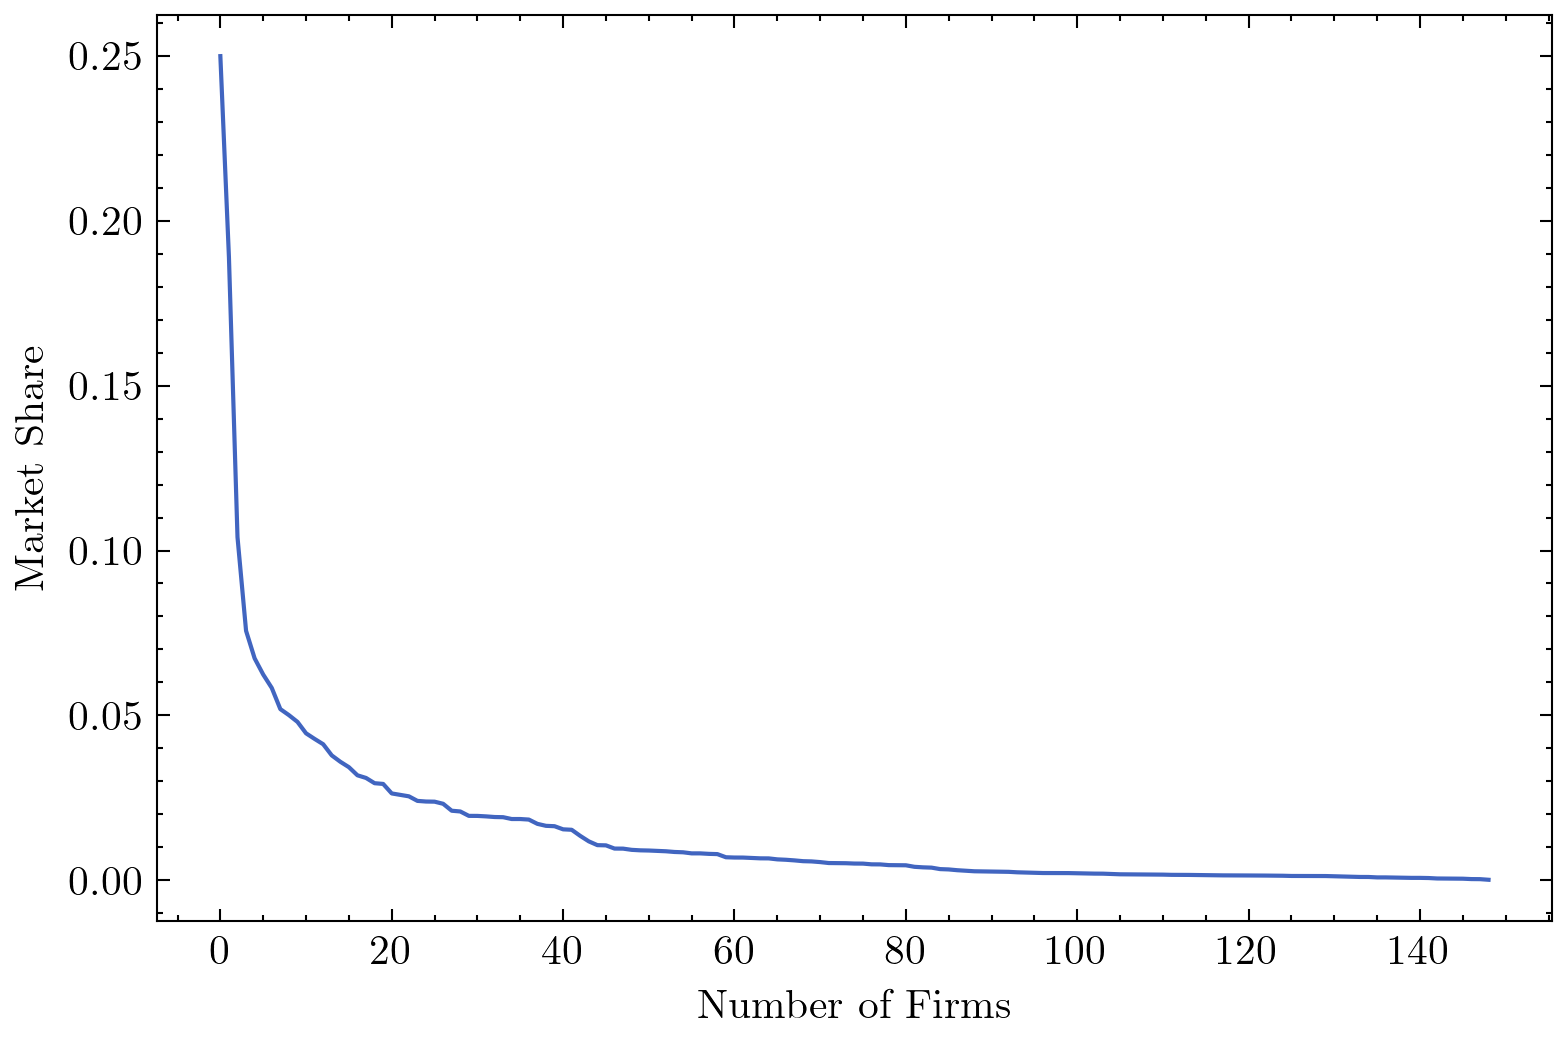

In [55]:
plt.figure(num=None, figsize=(6, 4), dpi=300)

market_shares.sort_values(by = 'ms_fs', ascending = False).reset_index().ms_fs.plot()
plt.ylabel('Market Share')
plt.xlabel('Number of Firms')


# plt.savefig('../Writing/My_Thesis/Chapters/ModelValidation/Images/Validation2.pdf')
plt.show()

### Frequencies of one-period GDP growth rates

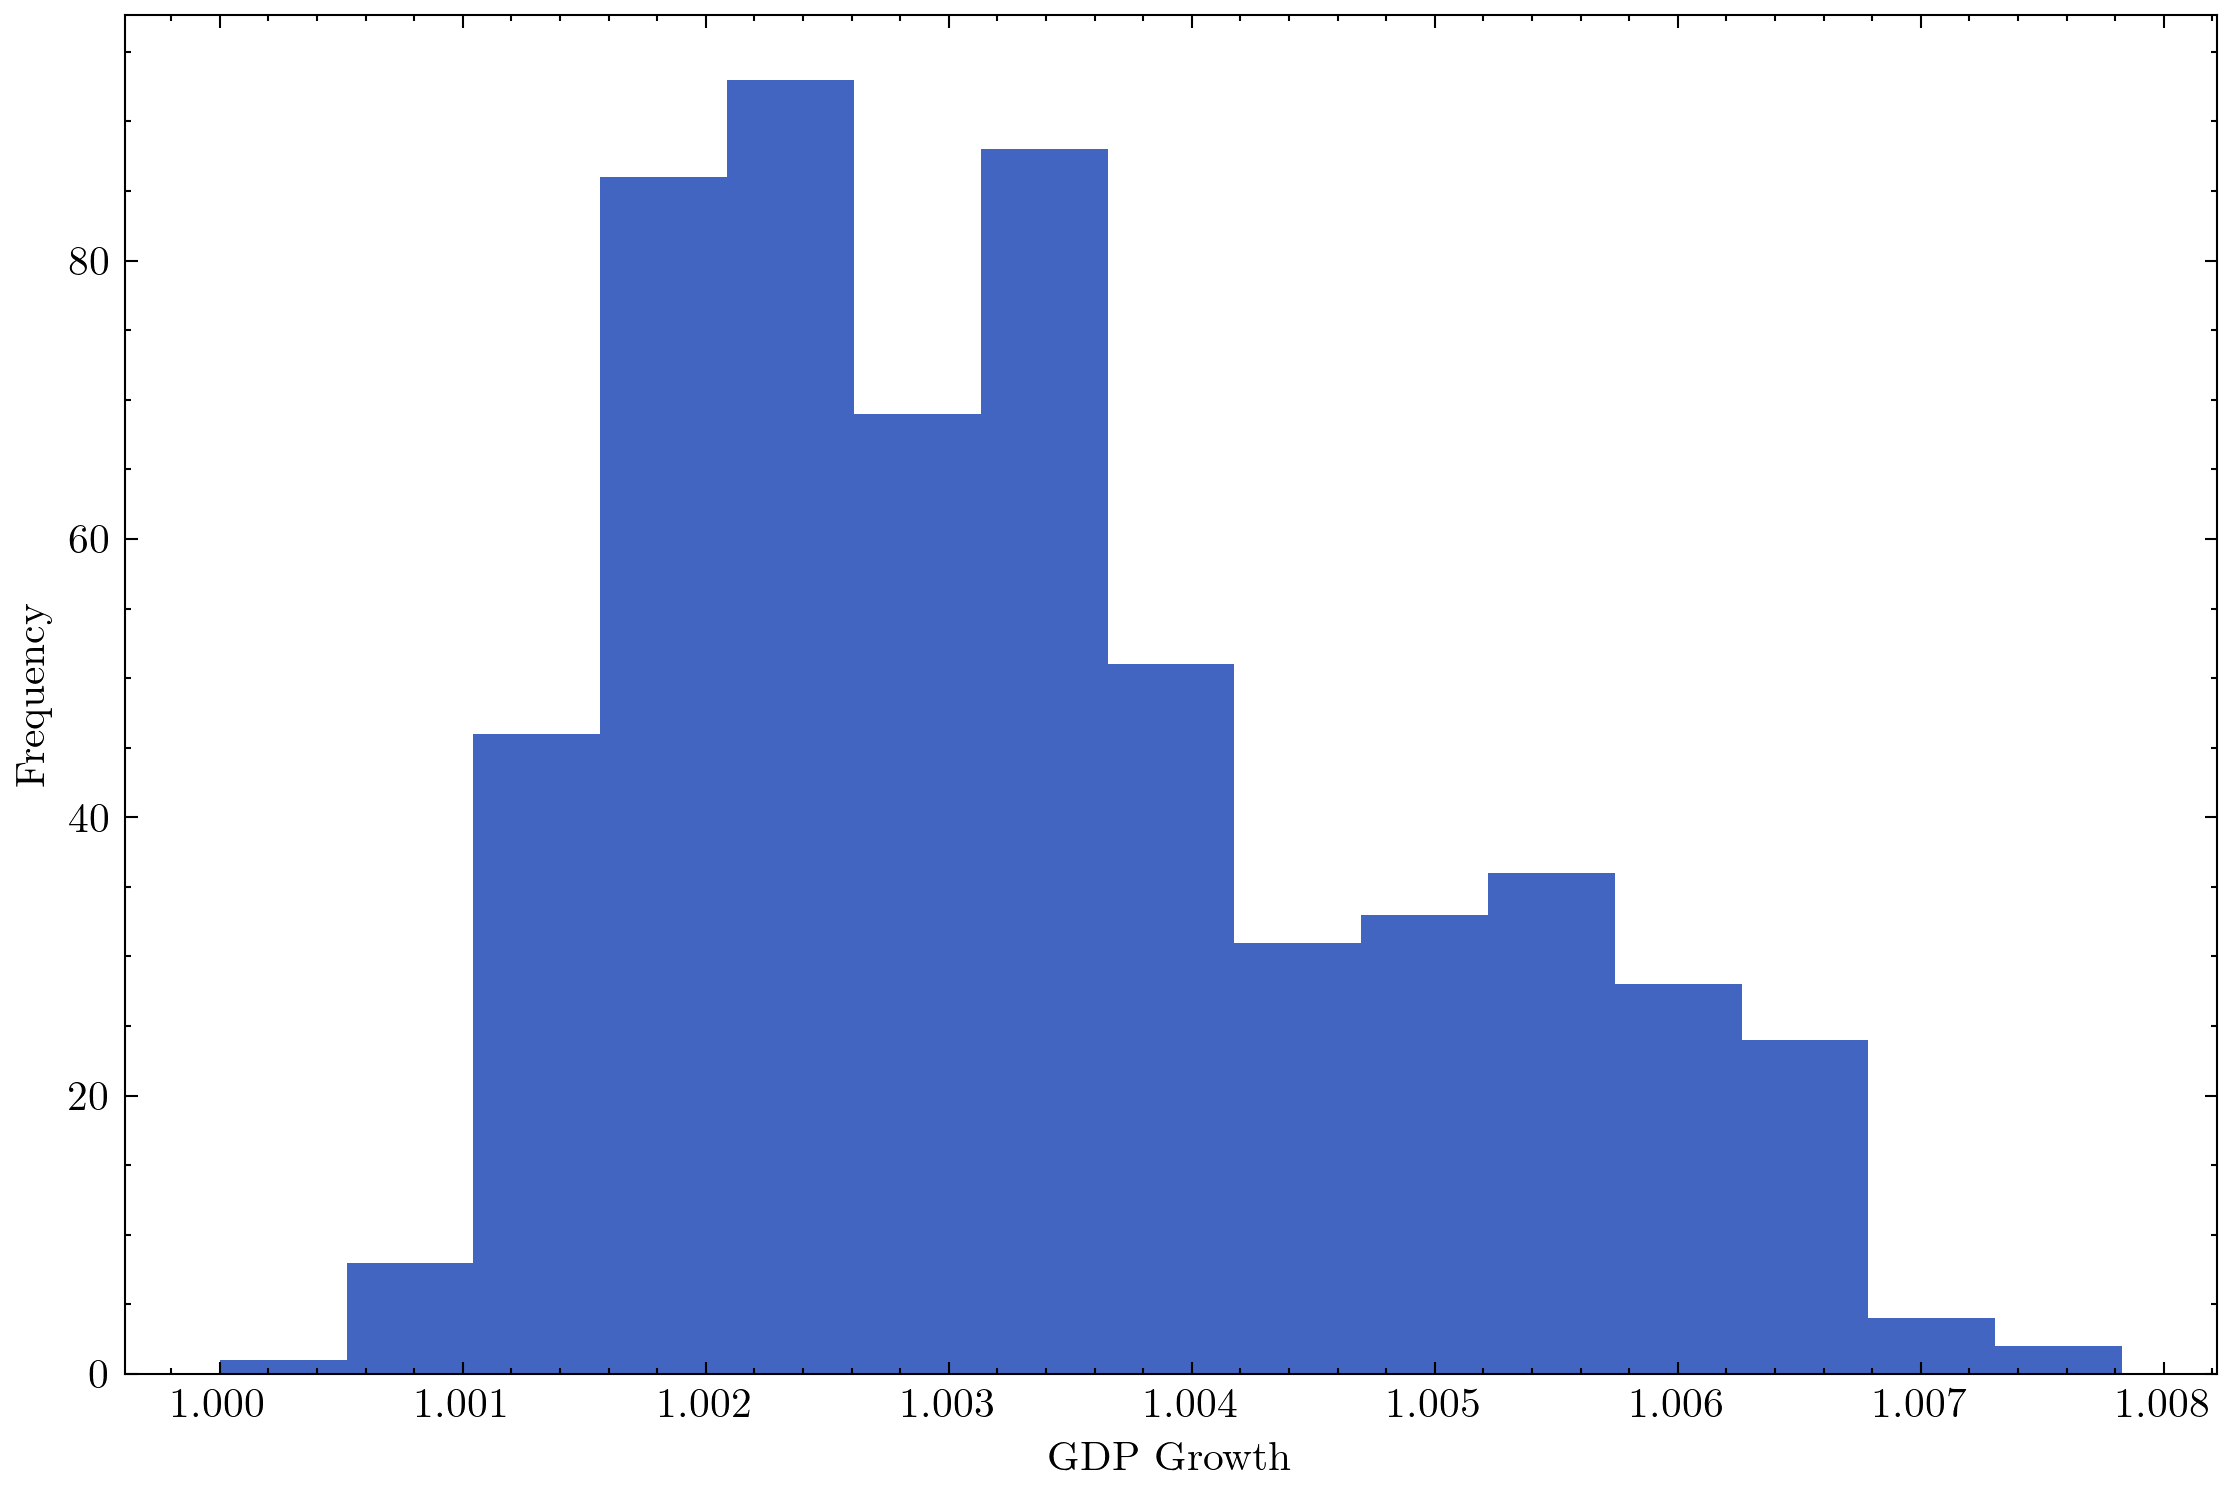

In [56]:
plt.figure(num=None, figsize=(9, 6), dpi=300)

plt.xlabel('GDP Growth')
plt.ylabel('Frequency')
# plt.xlim(0.9985,1.015)

model_df.GDPGrowth.plot.hist(bins=15)
# plt.savefig('../Writing/My_Thesis/Chapters/ModelValidation/Images/Validation3.pdf')

plt.show()